In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = 'https://raw.githubusercontent.com/dan1dr/microdosing/main/data/wide.csv'
data = pd.read_csv('./wide.csv', sep=',', index_col=0)
pd.options.display.max_columns = None

In [7]:
data.head()

ResponseId         StartDate           EndDate      RecordedDate  \
0  R_0HSeYpblz5LCLpD  19/09/2017 18:27  19/09/2017 18:51  19/09/2017 18:51   
1  R_0MpphsGkrwSMhuF  10/10/2017 21:06  10/10/2017 21:10  24/10/2017 21:10   
2  R_0N8EpmmQ5b79cxr  18/10/2017 20:29  18/10/2017 23:51  18/10/2017 23:51   
3  R_0Nj0uZDZlPP0IRX  18/09/2017 11:40  18/09/2017 11:58  18/09/2017 11:58   
4  R_0OZWDFj2krlpms9  22/09/2017 18:03  23/09/2017 06:47  07/10/2017 06:47   

   Angry  Distressed  Afraid  Frustrated  Nervous  Alarmed  Tense  Annoyed  \
0      0           1       1           1        1        1      1        1   
1      0           0       0           1        0        0      0        0   
2      0           0       0           0        0        0      0        0   
3      0           0       0           0        0        0      0        0   
4      0           1       0           0        1        0      0        0   

   Astonished  Excited  Alert  Delighted  Amused  Glad  Happy  Pleased  Sad  \
0           0        0      1          0       1     0      0        0    1   
1           0        0      0          0       0     0      0        0    1   
2           0        0      0          0       0     0      1        0    0   
3           0        0      0          0       0     0      0        0    0   
4           0        1      1          0       1     0      1        1    0   

   Miserable  Depressed  Droopy  Gloomy  Fatigued  Bored  Tired  Serene  \
0          1          0       1       1         0      0      1       0   
1          0          0       0       0         1      1      1       0   
2          0          0       1       0         1      0      1       0   
3          0          0       1       0         1      0      0       0   
4          0          0       1       0         0      0      1       1   

   Content  Calm  At ease  Satisfied  Relaxed  Sleepy  Quiet  Current  Reddit  \
0        0     0        0          0        0       1      0        1       5   
1        1     1        0          0        1       0      1        1       1   
2        1     0        0          0        1       1      0        2       2   
3        0     0        0          0        0       0      0        1       1   
4        1     0        1          1        1       1      0        2       5   

   Country  Age  Gender  Orientation  Ethnicity Ethnicity_11_TEXT  Religion  \
0      187   21    -1.0         -1.0          1               -99         1   
1      187   29    -1.0         -1.0          6               -99         1   
2      187   20    -1.0         -1.0         13               -99         1   
3      128   31    -1.0         -1.0          1               -99         1   
4       -1   27    -1.0         -1.0          1               -99        14   

  Religion_12_TEXT  Religiosity  Spirituality  Education  SES  AgeMD  \
0              -99            2            20        6.0  1.0     20   
1              -99           14            19        7.0  2.0     28   
2              -99            0             5        3.0  2.0     19   
3              -99            0            28        6.0  1.0     32   
4              -99            2            68        6.0  2.0     26   

   Substance_1  Substance_2  Substance_8  Dose_1  Dose_4  Dose_2  Dose_3  \
0            1          -99          -99     -99       1     -99     -99   
1            1            1          -99     -99       1     -99     -99   
2            1          -99          -99       1       1     -99     -99   
3            1          -99          -99     -99       1     -99     -99   
4          -99            1          -99     -99     -99       1     -99   

   Dose_7  Dose_8  Spacing  DoseNumber  Money Money_1_TEXT Money_2_TEXT  \
0     -99     -99        3        25.0      1            5          -99   
1     -99     -99        1        26.0      1           20          -99   
2     -99     -99        5        25.0      1           10          -

In [8]:
print(f"The number of participants were: {data['ResponseId'].nunique()}")

The number of participants were: 278


**Mood board.**
The scale consists of a number of words that describe different feelings and emotions. 

*Please select each item that describes how you have felt during the past week*

<img src="https://github.com/dan1dr/microdosing/blob/main/images/mood_board.png?raw=True" width="400" height="240">

In [9]:
data.loc[:,'Angry':'Quiet'].sum().sort_values(ascending=False)

Happy         161
Content       156
Calm          144
Amused        139
Tired         129
Relaxed       128
Alert         126
Pleased       126
Sleepy        125
Excited       124
Annoyed       113
Nervous       111
At ease       111
Frustrated    109
Satisfied     107
Glad          107
Fatigued      103
Quiet          99
Bored          97
Tense          93
Delighted      89
Serene         67
Sad            61
Depressed      55
Gloomy         45
Angry          42
Distressed     35
Afraid         31
Astonished     30
Droopy         24
Miserable      23
Alarmed        22
dtype: int64

*Do you currently microdose or will your response be based on past experience?*

In [10]:
data['Current'].value_counts()

1    150
2    128
Name: Current, dtype: int64

In [11]:
print(f"Currently microdosing: {sum(data['Current']==1)}")
print(f"Not currently, but in the past: {sum(data['Current']==2)}")

Currently microdosing: 150
Not currently, but in the past: 128


## Demographics

**In which country do you live?**

In [12]:
dict_countries = {187: "USA", 31: "CAN", 128: "NOR",
        9: "AUS", 65: "DEU", 168: "SWE", 
        122: "NLD", 185: "GBR", 60: "FIN",
        -1: "Not answered", 169: "CHE", 10: "AUT",
        61: "FRA", 82: "IRL", 163: "ESP", 179: "TUR",
        48: "DNK", 137: "POL", 84: "ITA", 123: "NZL",
        186: "TZA" , 111: "MEX", 17: "BEL",
        143: "RUS", 183: "UKR", 7: "ARG",
        1: "Prefer not to answer", 94: "LVA" }

In [13]:
data.replace({"Country": dict_countries}, inplace=True)
data['Country'].value_counts()

USA                     142
CAN                      31
NOR                      17
AUS                      13
DEU                      10
SWE                       8
NLD                       7
FIN                       6
GBR                       6
CHE                       5
Not answered              5
FRA                       3
IRL                       3
AUT                       3
ITA                       2
DNK                       2
POL                       2
TUR                       2
ESP                       2
MEX                       1
UKR                       1
BEL                       1
TZA                       1
LVA                       1
NZL                       1
ARG                       1
RUS                       1
Prefer not to answer      1
Name: Country, dtype: int64

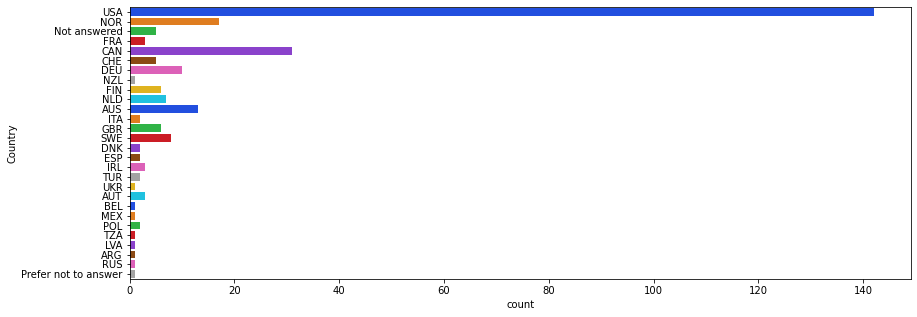

In [14]:
plt.figure(figsize=(14,5))
sns.countplot(data=data, y='Country', orient='h', palette='bright')

In [15]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [16]:
import plotly
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)

In [17]:
plotly.__version__
# requires version >= 1.9.0

'4.14.3'

In [18]:
countries = data['Country'].value_counts().to_frame()
edit_countries = countries.drop(['Not answered', 'Prefer not to answer', 'USA'], axis=0)
edit_countries

Country
CAN       31
NOR       17
AUS       13
DEU       10
SWE        8
NLD        7
FIN        6
GBR        6
CHE        5
FRA        3
IRL        3
AUT        3
ITA        2
DNK        2
POL        2
TUR        2
ESP        2
MEX        1
UKR        1
BEL        1
TZA        1
LVA        1
NZL        1
ARG        1
RUS        1

In [19]:
data_countries = dict(type = 'choropleth',
                      colorscale='Plasma',
                      reversescale=True, 
                      locations = edit_countries.index,
                      locationmode = 'ISO-3',
                      z = edit_countries['Country'],
                      text = edit_countries['Country'],
                      colorbar = {'title': 'Demography of survey'}
                     )

layout = dict(title = 'Demography of survey',
             geo = dict(showframe = False,
                        projection = {'type': 'natural earth'} ))

In [ ]:
chromap = go.Figure(data = [data_countries],
                    layout = layout)
plot(chromap, validate=False)

This is what we obtain, the plot it is not showed when uploading the notebook due to the library, you can choose to plot it here with ``iplot()`` or open a new window with ``plot()``

<img src="https://github.com/dan1dr/microdosing/blob/main/images/map1.png?raw=True" width="700" height="400">

**What is your age in years?**

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0., 194.,  65.,  12.]),
 array([-99. , -82.8, -66.6, -50.4, -34.2, -18. ,  -1.8,  14.4,  30.6,
         46.8,  63. ]),
 <a list of 10 Patch objects>)

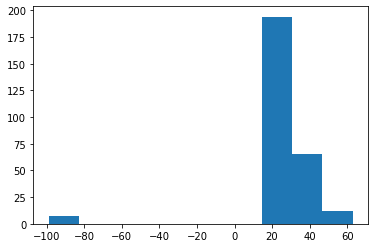

In [51]:
plt.hist(data['Age'])

Let's clean that negative ages (may be people which birth is to happen :D)

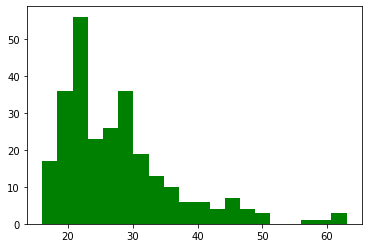

In [21]:
datav2 = data.drop(data.loc[data['Age'] < 0].index)
plt.hist(datav2['Age'], bins=20, color='green');

C:\Users\danid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



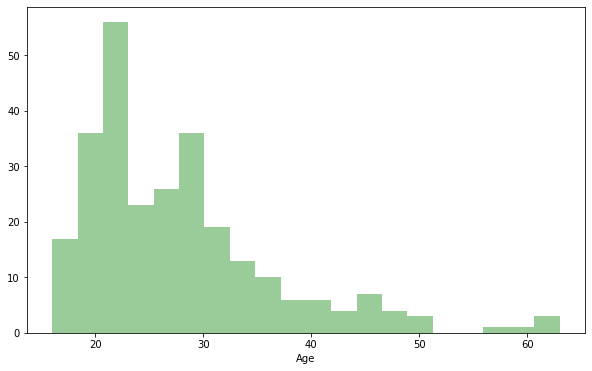

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(datav2['Age'], bins=20, kde=False,
             color='green', axlabel='Age');

C:\Users\danid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



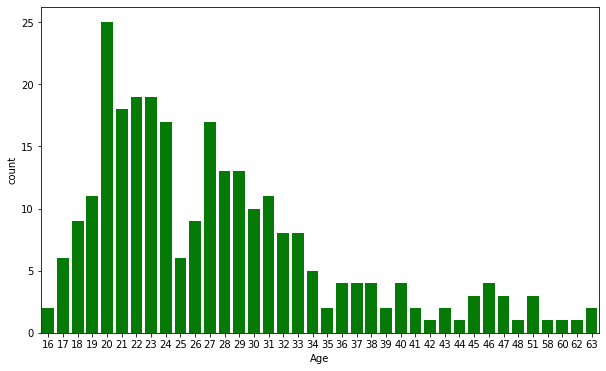

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(datav2['Age'], color='green', saturation=0.9)

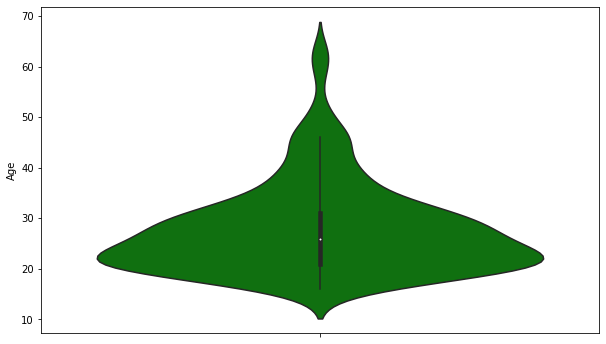

In [24]:
plt.figure(figsize=(10,6))
sns.violinplot(y=datav2['Age'], orient='v', color='green')

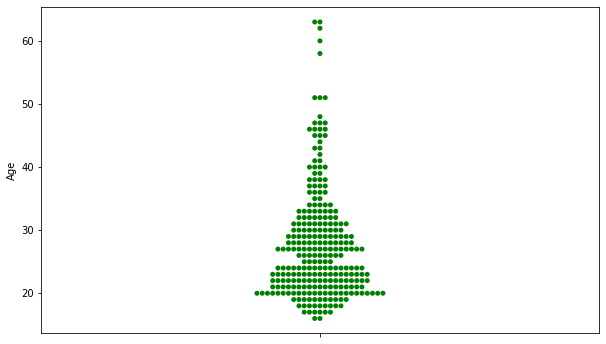

In [25]:
plt.figure(figsize=(10,6))
sns.swarmplot(y=datav2['Age'], orient='v', color='green')

**What is your gender?**

In [27]:
dict = {-1: 'Male', 1: 'Female'}
data.replace({"Gender": dict}, inplace=True)
data['Gender'].value_counts()

Male      237
Female     31
Name: Gender, dtype: int64

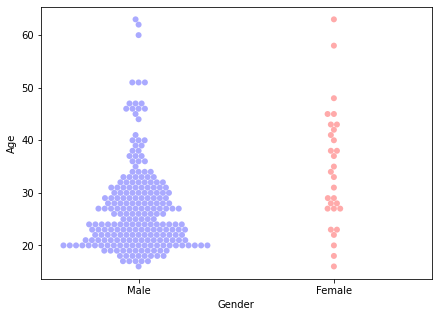

In [29]:
plt.figure(figsize=(7,5))
sns.swarmplot(x='Gender', y='Age', data=data.drop(data.loc[data['Age'] < 0].index), palette='bwr',
             order=['Male', 'Female'], size=6)

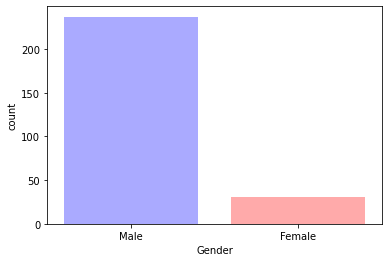

In [33]:
sns.countplot(x='Gender', data=data, palette='bwr',
              saturation=1)

**What is your sexual orientation?**

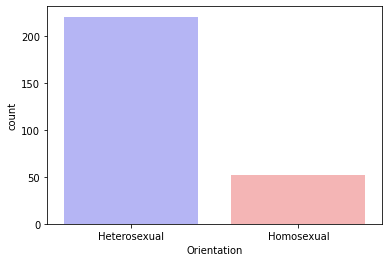

In [34]:
dict = {-1: 'Heterosexual', 1: 'Homosexual'}
data.replace({"Orientation": dict}, inplace=True)
sns.countplot(x='Orientation', data=data, palette='bwr')

In [36]:
data['Orientation'].value_counts()

Heterosexual    221
Homosexual       52
Name: Orientation, dtype: int64

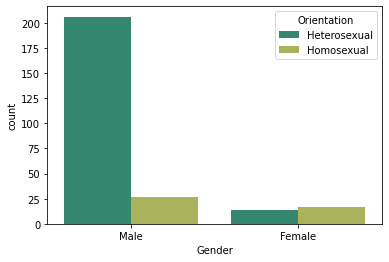

In [62]:
sns.countplot(x='Gender', data=data, hue='Orientation',
              palette='gist_earth', saturation=1)

As a curiosity, the number of homosexual people among females was much higher than in males

In [38]:
data[data['Gender'] == 'Female']['Orientation'].value_counts()

Homosexual      17
Heterosexual    14
Name: Orientation, dtype: int64

**What is your ethnic heritage?**

In [39]:
dict = {1: 'White', 8: 'European', 10: 'Mixed',
        13: 'Hispanic or Latino', 11: 'Other', 
        6: 'Middle Eastern', 4: 'East Asian',
        12: 'Prefer not to answer', 5: 'South Asian',
        2: 'Black' }
data.replace({'Ethnicity':dict}, inplace=True)

In [40]:
data['Ethnicity'].count()

278

In [41]:
data['Ethnicity'].value_counts()

White                   209
European                 25
Mixed                    14
Hispanic or Latino       10
Middle Eastern            6
Other                     6
East Asian                4
Prefer not to answer      2
Black                     1
South Asian               1
Name: Ethnicity, dtype: int64

In [42]:
data['Ethnicity'].value_counts()/data['Ethnicity'].count()*100
#Percentages

White                   75.179856
European                 8.992806
Mixed                    5.035971
Hispanic or Latino       3.597122
Middle Eastern           2.158273
Other                    2.158273
East Asian               1.438849
Prefer not to answer     0.719424
Black                    0.359712
South Asian              0.359712
Name: Ethnicity, dtype: float64

**What, if any, is your religious affilitation?**

In [43]:
dict = {1: 'Non-religious', 14: 'Spiritual but non-religious',
        2: 'Judaism', 7: 'Hinduism', 8: 'Buddhism', 9: 'Sihkism',
        3: 'Christianity', 4: 'Islam', 12: 'Other',
        13: 'Prefer not to answer'}
data.replace({'Religion': dict}, inplace=True)
data['Religion'].value_counts()

Non-religious                  162
Spiritual but non-religious     81
Other                           12
Christianity                     9
Buddhism                         8
Judaism                          4
Prefer not to answer             1
Hinduism                         1
Name: Religion, dtype: int64

In [44]:
data['Religion'].value_counts() / data['Religion'].count() *100

Non-religious                  58.273381
Spiritual but non-religious    29.136691
Other                           4.316547
Christianity                    3.237410
Buddhism                        2.877698
Judaism                         1.438849
Prefer not to answer            0.359712
Hinduism                        0.359712
Name: Religion, dtype: float64

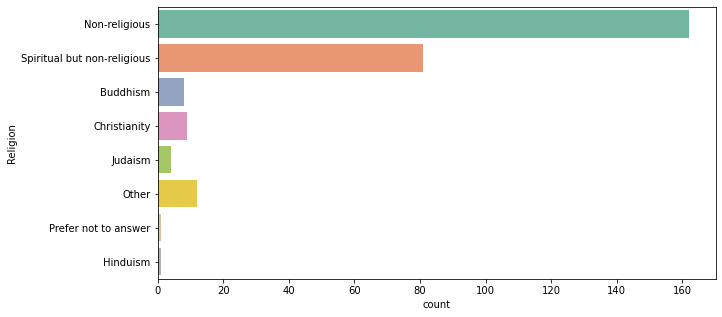

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(y='Religion', data=data, orient='h', palette='Set2')

C:\Users\danid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



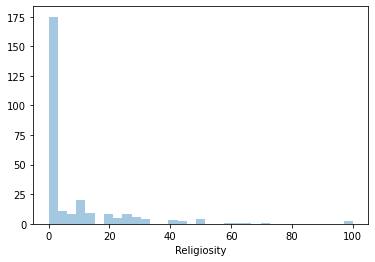

In [46]:
datav2 = data.drop(data.loc[data['Religiosity'] < 0].index)
sns.distplot(datav2['Religiosity'], kde=False)

In [47]:
datav2['Religiosity'].mean()

8.137546468401487

**Please use the bar to indicate how religious and spiritual consider yourself (from 0 to 100)?**

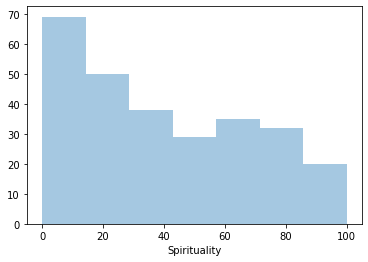

In [48]:
datav3 = data.drop(data.loc[data['Spirituality'] < 0].index)
sns.distplot(datav3['Spirituality'], kde=False)

In [49]:
datav3['Spirituality'].mean()

39.87179487179487

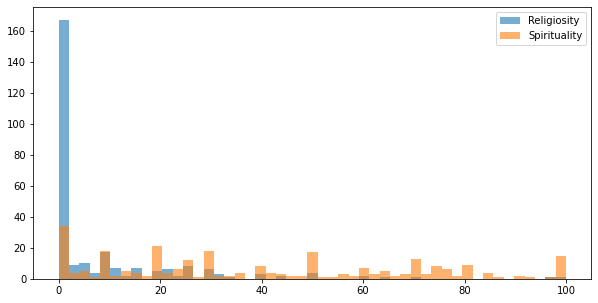

In [50]:
import numpy as np
plt.figure(figsize=(10,5))
x = datav2['Religiosity']
y = datav3['Spirituality']

bins = np.linspace(0, 100)

plt.hist(x, bins, alpha=0.6, label='Religiosity')
plt.hist(y, bins, alpha=0.6, label='Spirituality')
plt.legend(loc='upper right')
plt.show()

**What is your occupation? Please be general (e.g. "student", "software developer")**

Consult the [International Standard
Classifi cation of Occupations](https://www.ilo.org/wcmsp5/groups/public/---dgreports/---dcomm/---publ/documents/publication/wcms_172572.pdf) to see correspondences

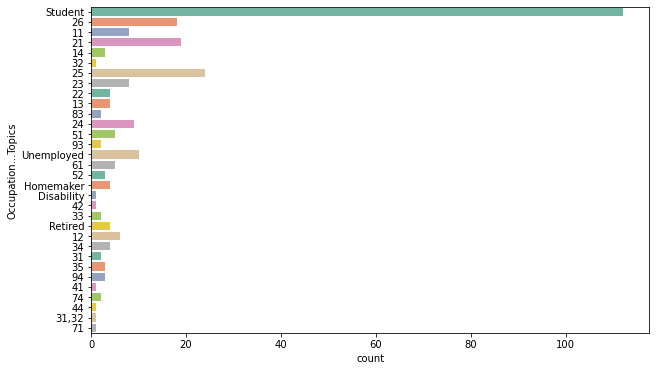

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y=data['Occupation...Topics'], palette='Set2')

**What is your highest completed formal education?**

In [53]:
dict = {1: 'Doctoral', 2: 'Master', 3: 'Bachelor',
        4: 'Short-cycle tertiary education',
        5: 'Post-secondary non-tertiary education',
        6: 'Upper secondary education', 7 : 'Lower secondary education',
        9: 'Primary education', 10: 'Early childhood education', 
        8: 'Prefer not to answer'}
data.replace({'Education':dict}, inplace=True)
data['Education'].value_counts()

Upper secondary education                107
Short-cycle tertiary education            44
Bachelor                                  41
Lower secondary education                 28
Post-secondary non-tertiary education     24
Doctoral                                  12
Prefer not to answer                       8
Master                                     5
0.0                                        2
Name: Education, dtype: int64

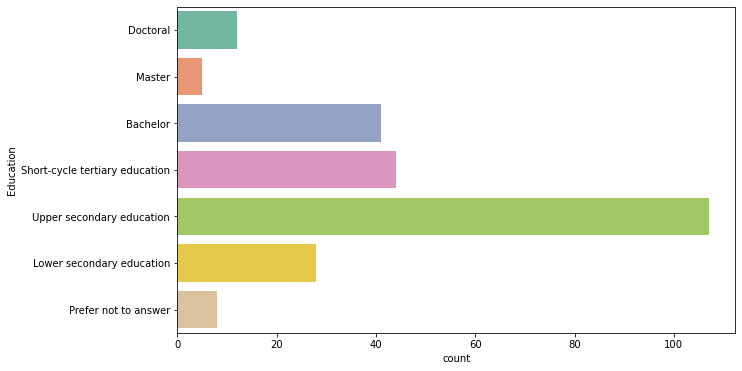

In [54]:
plt.figure(figsize=(10,6))
order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
         'Upper secondary education', 'Lower secondary education', 'Prefer not to answer']
sns.countplot(y='Education', data=data, orient='h', palette='Set2', order=order)

**What is the social class of your household?**

In [55]:
dict = {3: 'Upper class', 2: 'Upper-middle class', 1: 'Middle class',
        0: 'Lower-middle class', -1: 'Skilled working class', -2: 'Working class',
        -3: 'Non-working class', 99: 'Prefer not to answer'}

data.replace({'SES': dict}, inplace=True)
data['SES'].value_counts()

Middle class             128
Upper-middle class        54
Lower-middle class        39
Skilled working class     19
Non-working class         16
Working class             15
Name: SES, dtype: int64

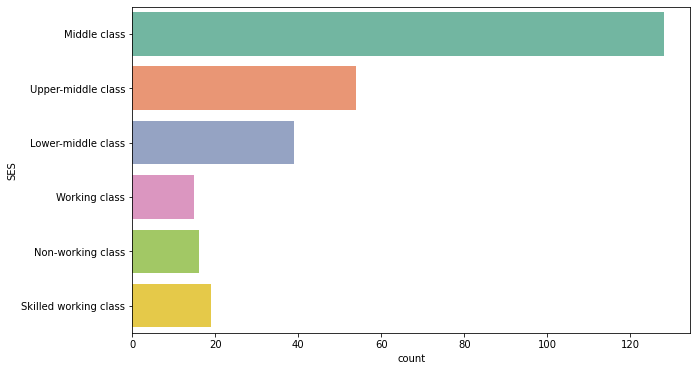

In [56]:
plt.figure(figsize=(10,6))
#order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
sns.countplot(y='SES', data=data, orient='h', palette='Set2')

## Microdosing

**At what age did your first begin microdosing?**

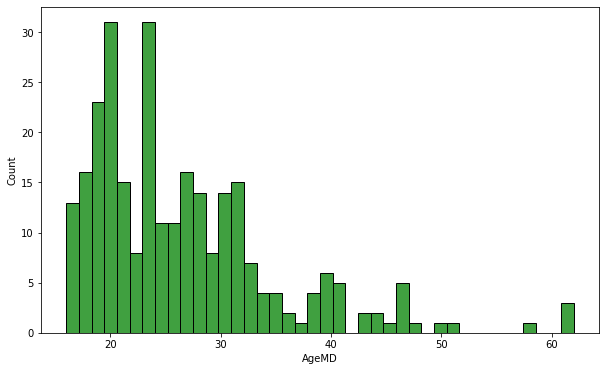

In [57]:
datav2 = data.drop(data.loc[data['AgeMD'] < 0].index)

plt.figure(figsize=(10,6))
sns.histplot(data=datav2, x=datav2['AgeMD'], bins=40, color='Green')

**What substance do you use for microdosing?**

In [58]:
print(f"LSD: {sum(data['Substance_1']==1)}")
print(f"Psilocybin: {sum(data['Substance_2']==1)}")
print(f"Other: {sum(data['Substance_8']==1)}")

LSD: 228
Psilocybin: 83
Other: 0


**If you have a way of estimating your dose please report it here**

In [59]:
#data.loc[data['Dose_1']==1]['Dose_1_TEXT...Topics']
LSD_micrograms = data.loc[data['Dose_4']==1]['Dose_4_TEXT...Topics']
LSD_percent_per_tab = data.loc[data['Dose_1']==1]['Dose_1_TEXT...Topics'] 
Psilocybin_grams = data.loc[data['Dose_2']==1]['Dose_2_TEXT...Topics']

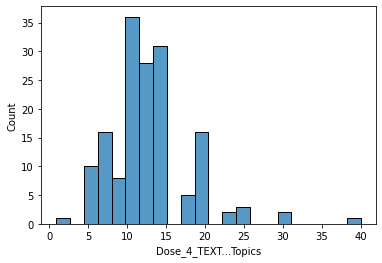

In [60]:
sns.histplot(data=LSD_micrograms, x=data['Dose_4_TEXT...Topics'])

Text(0.5, 0.98, 'LSD dose')

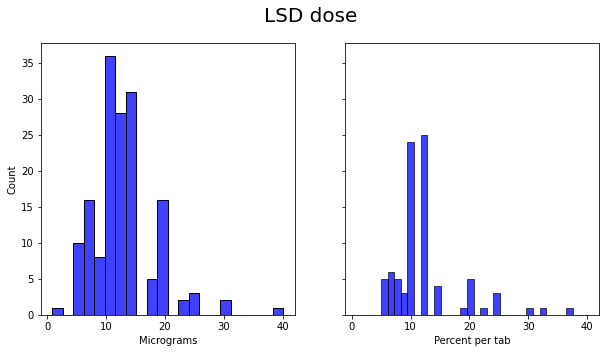

In [61]:
fig, axs = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(10,5))
sns.histplot(data=LSD_micrograms, x=data['Dose_4_TEXT...Topics'], ax=axs[0], color='blue')
axs[0].set(xlabel="Micrograms", ylabel = "Count")

sns.histplot(data=LSD_percent_per_tab, x=data['Dose_1_TEXT...Topics'], ax=axs[1], color='blue')
axs[1].set(xlabel="Percent per tab")
plt.suptitle('LSD dose',fontsize=20)

#assuming a tab of 100 micrograms we could mix them

Text(0.5, 1.0, 'Psilocybin dose')

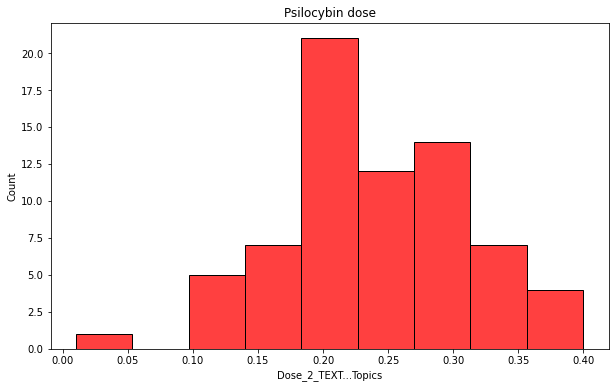

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(data=Psilocybin_grams, x=data['Dose_2_TEXT...Topics'], color='Red').set_title('Psilocybin dose')

In [63]:
print(f"Responded LSD (% per tab): {(data['Dose_1']==1).sum()}")
print(f"Responded LSD (micrograms): {(data['Dose_4']==1).sum()}")
print(f"Responded Psilocybin (grams): {(data['Dose_2']==1).sum()}")
print(f"Responded other: {(data['Dose_3']==1).sum()}")
print(f"I estimate does primarily through trial and error, and by experience: {(data['Dose_7']==1).sum()}")
print(f"I do not really estimate a dose (superheroes): {(data['Dose_8']==1).sum()}")

Responded LSD (% per tab): 96
Responded LSD (micrograms): 165
Responded Psilocybin (grams): 77
Responded other: 7
I estimate does primarily through trial and error, and by experience: 37
I do not really estimate a dose (superheroes): 2


**How many days (approximately) do you space between microdoses?**

In [64]:
dict = {0: 'Every single day', 1: 'Every other day', 2: '1 day on, 2 days off',
        3: '1 day on, 3 days off', 4: '1 day on, 4 days off', 5: '1 day on, 5 days off',
        6: '1 day on, 6 days off', 7: 'Once a week',
        10: 'Once every week and a half', 14: 'Once every 2 weeks', 21: 'Once every 3 weeks',
        30: 'Once every month', 60: 'Once 2 months', -1: 'Less than once every 2 months'}

data.replace({'Spacing': dict}, inplace=True)
data['Spacing'].value_counts()

1 day on, 2 days off          110
1 day on, 3 days off           53
Once a week                    29
Every other day                25
Every single day               16
Once every 2 weeks              9
1 day on, 4 days off            8
Once every month                8
Once every week and a half      7
1 day on, 6 days off            4
1 day on, 5 days off            3
Once every 3 weeks              3
Once 2 months                   3
Name: Spacing, dtype: int64

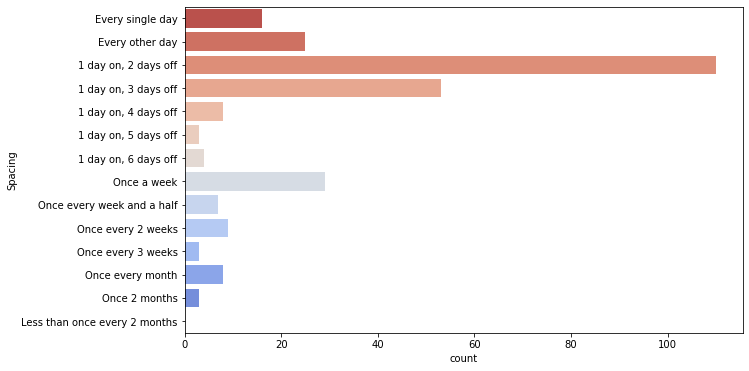

In [65]:
plt.figure(figsize=(10,6))
order = ['Every single day', 'Every other day', '1 day on, 2 days off',
         '1 day on, 3 days off', '1 day on, 4 days off', '1 day on, 5 days off',
         '1 day on, 6 days off', 'Once a week', 
         'Once every week and a half', 'Once every 2 weeks', 'Once every 3 weeks',
         'Once every month', 'Once 2 months', 'Less than once every 2 months']
#order = ['Doctoral', 'Master', 'Bachelor', 'Short-cycle tertiary education',
sns.countplot(data=data, y=data['Spacing'], orient='h', order=order, palette='coolwarm_r')

**Approximately how many microdoses have you taken in your lifetime? (Exclude full-doses)**

Text(0.5, 1.0, 'Microdoses in lifetime')

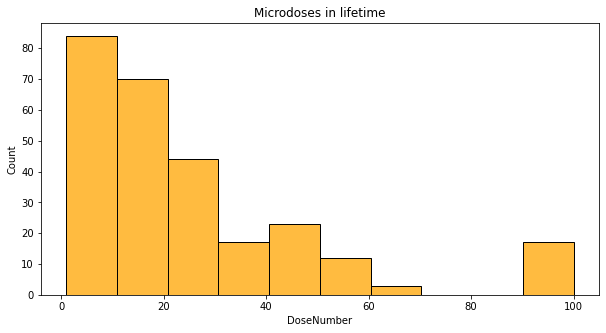

In [66]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x='DoseNumber', bins=10, color='orange').set_title('Microdoses in lifetime')

In [67]:
data['DoseNumber'].mean()

26.47037037037037

**How much money (approximately) do you spend on microdosing per month?**

In [68]:
data['Money'].value_counts()
#convert eur, cad, gbp and other currency to USD

 1     154
 3      48
 2      33
 6      30
-99      7
 5       6
Name: Money, dtype: int64

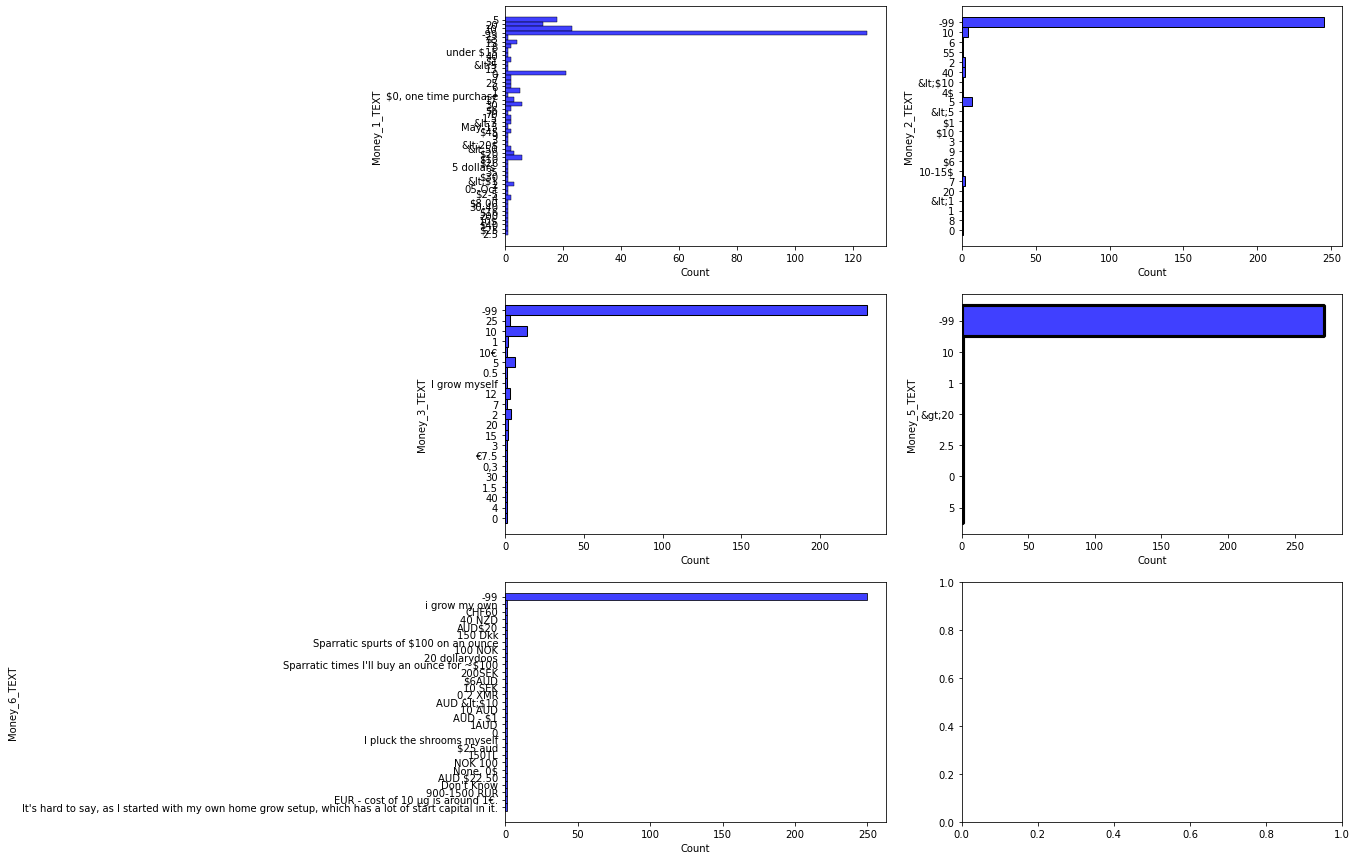

In [69]:
fig, axs = plt.subplots(3,2, figsize=(15,15))

sns.histplot(data=data, y=data['Money_1_TEXT'], ax=axs[0,0], color='blue')

sns.histplot(data=data, y=data['Money_2_TEXT'], ax=axs[0,1], color='blue')

sns.histplot(data=data, y=data['Money_3_TEXT'], ax=axs[1,0], color='blue')

sns.histplot(data=data, y=data['Money_5_TEXT'], ax=axs[1,1], color='blue')

sns.histplot(data=data, y=data['Money_6_TEXT'], ax=axs[2,0], color='blue')

mmm nop, too much noise. We will only take USD

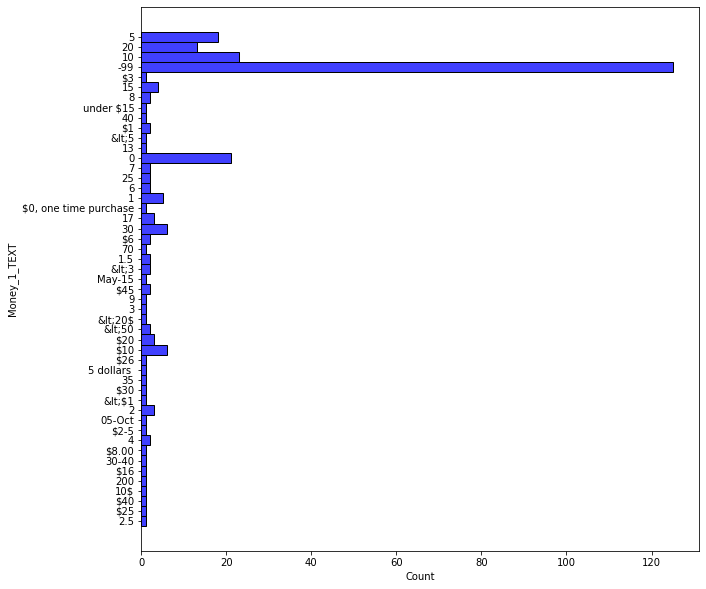

In [70]:
plt.figure(figsize=(10,10))
sns.histplot(data=data, y=data['Money_1_TEXT'] ,color='blue')

We need to clean the answers to be able to obtain more info

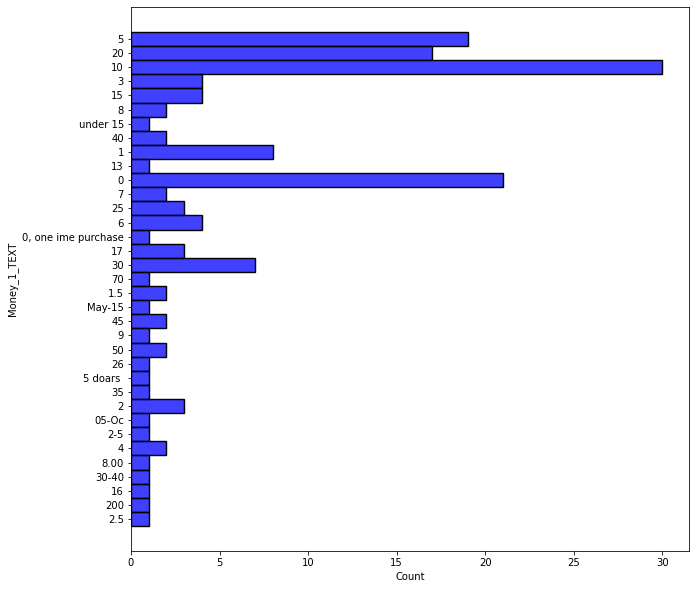

In [71]:
plt.figure(figsize=(10,10))
data['Money_1_TEXT'] = data['Money_1_TEXT'].apply(lambda x: x.translate({ord(i): None for i in '$&lt;'}))
USD_clean = data['Money_1_TEXT'].drop(data.loc[data['Money_1_TEXT'] == '-99'].index)
sns.histplot(data=USD_clean, y=USD_clean ,color='blue')

So it ranges from few dollars to 20-30 $

**How many of your friends, colleagues, and other acquaintances microdose?**

In [72]:
data['Friends'].value_counts()

0     111
1      63
2      45
3      28
4      11
5       8
15      6
6       6
Name: Friends, dtype: int64

**Would you recommend that others try microdosing?**

In [73]:
print(f"Yes, anyone and everyone: {sum(data['Recommend']==1)}")
print(f"Yes, for most people: {sum(data['Recommend']==2)}")
print(f"Maybe, for some people: {sum(data['Recommend']==3)}")
print(f"No, not for most people: {sum(data['Recommend']==4)}")
print(f"No, not for anyone: {sum(data['Recommend']==5)}")

Yes, anyone and everyone: 40
Yes, for most people: 121
Maybe, for some people: 109
No, not for most people: 0
No, not for anyone: 8


In [74]:
print(f"YES: {(sum(data['Recommend']==1)+sum(data['Recommend']==2))/len(data)*100} %")
print(f"MAYBE: {sum(data['Recommend']==3)/len(data)*100} %")
print(f"NO: {(sum(data['Recommend']==4)+sum(data['Recommend']==5))/len(data)*100} %")

YES: 57.9136690647482 %
MAYBE: 39.20863309352518 %
NO: 2.877697841726619 %


## Patient history

**How would you rate your overall health?**

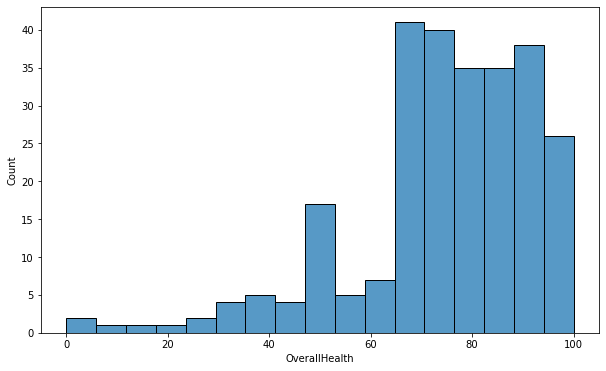

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='OverallHealth')

In [76]:
data['OverallHealth'].median(), data['OverallHealth'].mean()

(77.5, 74.52651515151516)

In [77]:
health_lsd = data[data['Substance_1']==1]['OverallHealth'] 
health_psilocybin = data[data['Substance_2']==1]['OverallHealth']

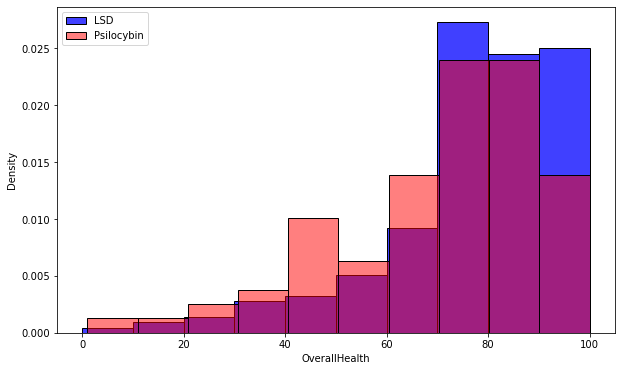

In [78]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x=health_lsd,stat="density", color='blue', bins=10)
sns.histplot(data=data,x=health_psilocybin, stat="density", color='red', bins=10, alpha=0.5)
plt.legend(['LSD', 'Psilocybin'], loc='upper left')

**Indicate which of the following substances you have used for recreational purposes (e.g. for fun, with friends, for experimenting)**

In [79]:
data['DrugRecreational_1']

0      2.0
1      1.0
2      1.0
3      4.0
4      1.0
      ... 
273    1.0
274    2.0
275    2.0
276    2.0
277    1.0
Name: DrugRecreational_1, Length: 278, dtype: float64

In [80]:
data.columns.get_indexer(['DrugRecreational_1'])[0]
#data['DrugRecreational_1'].column

95

In [81]:
data.iloc[:,data.columns.get_indexer(['DrugRecreational_1'])[0]]

0      2.0
1      1.0
2      1.0
3      4.0
4      1.0
      ... 
273    1.0
274    2.0
275    2.0
276    2.0
277    1.0
Name: DrugRecreational_1, Length: 278, dtype: float64

In [82]:
data.iloc[:,95].name == 'DrugRecreational_1'

True

In [83]:
dict = {1.0: 'Past Month', 2.0: 'Past Year', 3.0: 'Ever Used',
        4.0: 'Never Used', 5.0: 'Prefer not to answer'}
counter = 0
for i in range(1,14):
    index = data.columns.get_indexer(['DrugRecreational_1'])[0]
    data.replace({(data.iloc[:, index + counter]).name: dict, }, inplace=True)
    counter += 1

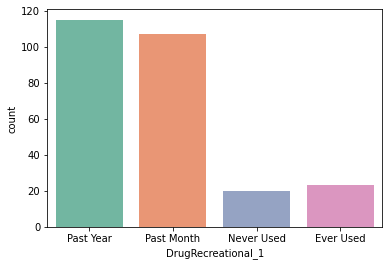

In [84]:
sns.countplot(data=data, x=data['DrugRecreational_1'], palette='Set2')

In [85]:
index = data.columns.get_indexer(['DrugRecreational_1'])[0]
data.iloc[:,index].name

'DrugRecreational_1'

In [86]:
dict = {'DrugRecreational_1': 'Classic Hallucinogens (full dose)',
        'DrugRecreational_2': 'Research chemical Hallucinogens (full dose)',
        'DrugRecreational_3': 'MDxx',
        'DrugRecreational_4': 'Cannabis',
        'DrugRecreational_5': 'Alcohol',
        'DrugRecreational_6': 'Stimulants',
        'DrugRecreational_7': 'Opiates',
        'DrugRecreational_8': 'Dissociatives',
        'DrugRecreational_9': 'Sedatives',
        'DrugRecreational_10': 'Inhalants',
        'DrugRecreational_11': 'Caffeine',
        'DrugRecreational_12': 'Nootropics',
        'DrugRecreational_13': 'Prescription drugs',
       }

type(dict.get('DrugRecreational_1'))

str

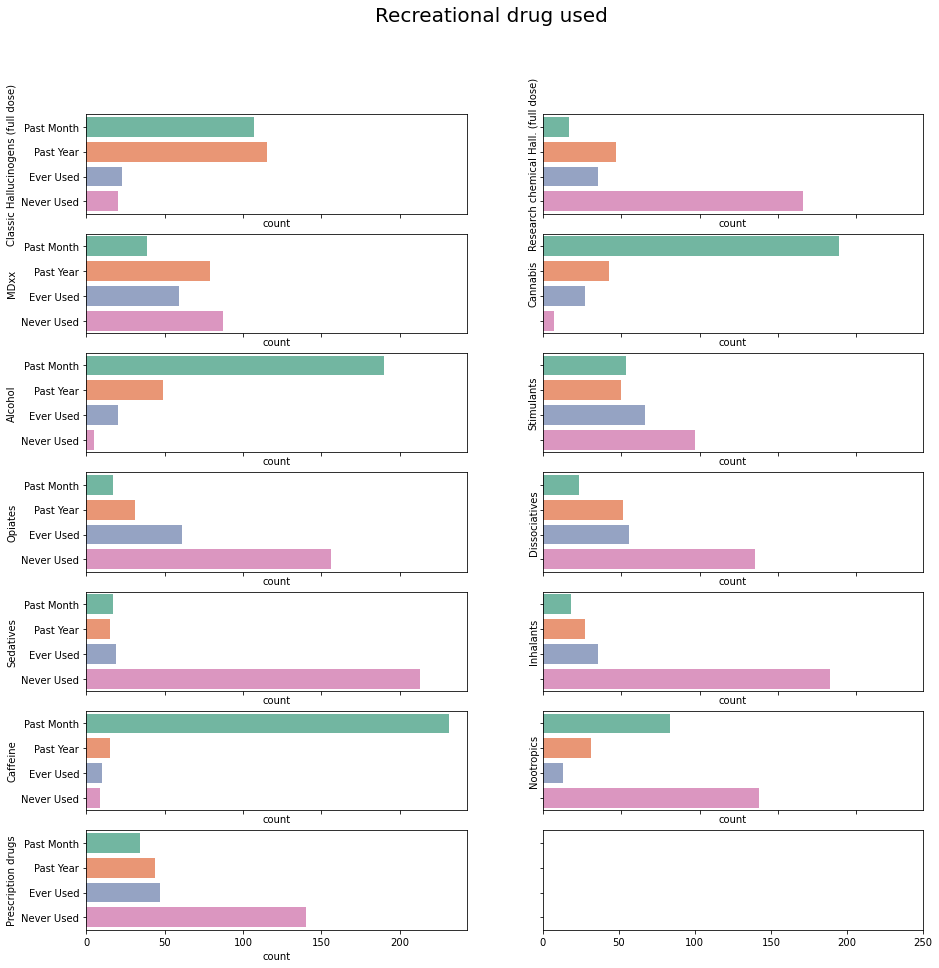

In [87]:
fig, axs = plt.subplots(7,2, sharey=True, sharex=True, figsize=(15,15))
dict = {'DrugRecreational_1': 'Classic Hallucinogens (full dose)',
        'DrugRecreational_2': 'Research chemical Hall. (full dose)',
        'DrugRecreational_3': 'MDxx',
        'DrugRecreational_4': 'Cannabis',
        'DrugRecreational_5': 'Alcohol',
        'DrugRecreational_6': 'Stimulants',
        'DrugRecreational_7': 'Opiates',
        'DrugRecreational_8': 'Dissociatives',
        'DrugRecreational_9': 'Sedatives',
        'DrugRecreational_10': 'Inhalants',
        'DrugRecreational_11': 'Caffeine',
        'DrugRecreational_12': 'Nootropics',
        'DrugRecreational_13': 'Prescription drugs',
       }

order = ['Past Month', 'Past Year', 'Ever Used', 'Never Used']

counter = 0
row = 0
for i in range(1,14):
    if counter % 2 != 0:
        column = 1
    else:
        column = 0
    index = data.columns.get_indexer(['DrugRecreational_1'])[0]
    name = data.iloc[:, index+counter].name
    sns.countplot(data=data, y=data[name], order=order, ax=axs[row, column], palette='Set2')
    axs[row, column].set(ylabel=dict.get(name))
    plt.xticks([0, 50, 100, 150, 200, 250])
    counter += 1
    if column == 1:
        row += 1
    
plt.suptitle('Recreational drug used',fontsize=20);

**Score "Polydrug User Experiences Index"**

A "Polydrug user experience index" will be computed as the sum of items indicating recreational substance use:

 - Each class of drug used in past month: +4 points
 
 - Each class of drug used in past year: +2 points
 
 - Each class of drug used ever: +1 point.
 
 - Each class of drug never used: +0 points
 
 - Each class of drug "Prefer not to answer": +0 points
 
 - As there are 13 classes of substance listed in the survey the scores may range from 0-52
 

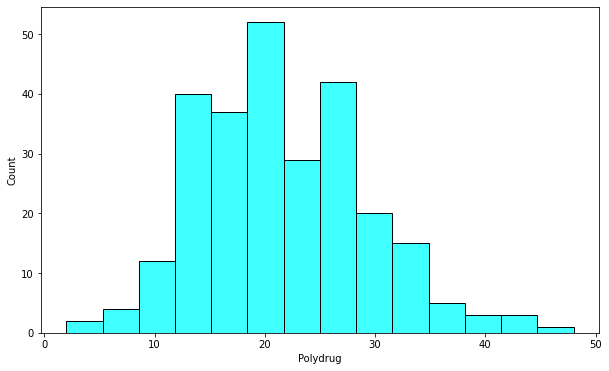

In [88]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['Polydrug'], color='aqua')

**Were you taking any recreational drugs in addition to your microdose while you were microdosing?**

In [89]:
print(f"Yes: {sum(data['DrugRecreationalMD']==1)}")
print(f"No: {sum(data['DrugRecreationalMD']==4)}")

Yes: 54
No: 67


In [90]:
data['DrugRecreationalMD_1_TEXT...Topics'].value_counts()

Cannabis              39
Cannabis,Alcohol       6
Alcohol                4
Other                  3
Other Psychedelics     2
Name: DrugRecreationalMD_1_TEXT...Topics, dtype: int64

**Have you ever been diagnosed by a doctor or health care professional with any of the following diagnoses?**

In [140]:
print(f"Attention-Deficit/Hyperactivity Disorder (ADHD): {sum(data['Diagnoses_2']==1)}")
print(f"Autism Spectrum Disorder: {sum(data['Diagnoses_3']==1)}")
print(f"Obsessive Compulsive Disorder: {sum(data['Diagnoses_4']==1)}")
print(f"Posttraumatic Stress Disorder: {sum(data['Diagnoses_5']==1)}")
print(f"Substance Use Disorder: {sum(data['Diagnoses_18']==1)}")
print(f"Dissociative Identity Disorder: {sum(data['Diagnoses_14']==1)}")
print(f"Anxiety: {sum(data['Diagnoses_7']==1)}")
print(f"Mood Disorder: {sum(data['Diagnoses_8']==1)}")
print(f"Eating Disorder: {sum(data['Diagnoses_15']==1)}")
print(f"Schizophrenia Spectrum Disorder: {sum(data['Diagnoses_16']==1)}")
print(f"None of the above: {sum(data['Diagnoses_10']==1)}")

Attention-Deficit/Hyperactivity Disorder (ADHD): 54
Autism Spectrum Disorder: 9
Obsessive Compulsive Disorder: 7
Posttraumatic Stress Disorder: 17
Substance Use Disorder: 3
Dissociative Identity Disorder: 5
Anxiety: 73
Mood Disorder: 72
Eating Disorder: 2
Schizophrenia Spectrum Disorder: 4
None of the above: 137


**Are you currently taking any prescription drugs as prescribed by a doctor or health care professional?**

In [93]:
dict = {1: 'Yes', 4: 'No', 5: 'Prefer Not To Answer'}
data.replace({'DrugRXCurrent': dict}, inplace=True)
data['DrugRXCurrent'].value_counts()

No                      199
Yes                      64
Prefer Not To Answer      2
Name: DrugRXCurrent, dtype: int64

In [94]:
data['DrugRXCurrent_1_TEXT...Topics'].value_counts(ascending=False)

Non-psychotropic                                                                              18
Dopamine and norepinephrine reuptake inhibitor and releaser                                   11
Benzodiazepine receptor agonist                                                                4
SSRI                                                                                           3
Unknown                                                                                        3
Norepinephrine reuptake inhibitor                                                              2
SSRI,5-HT2 receptor antagonist and 5-HT1A receptor agonist                                     2
Mood stabilizer - voltage-gated sodium channel blocker                                         2
Non-psychotropic,voltage-gated calcium channel blocker                                         2
Bupropion                                                                                      2
Triptan                       

**Were you taking any prescription drugs while you were microdosing?**

In [95]:
data.replace({'DrugRXMD': dict}, inplace=True)
data['DrugRXMD'].value_counts()

No                      109
Yes                      11
Prefer Not To Answer      1
Name: DrugRXMD, dtype: int64

In [96]:
data['DrugRXMD_1_TEXT...Topics'].value_counts()

Non-psychotropic                                                         6
Non-psychotropic,SSRI                                                    1
SSRI                                                                     1
Bupropion,Dopamine and norepinephrine reuptake inhibitor and releaser    1
Dopamine and norepinephrine reuptake inhibitor and releaser              1
Bupropion                                                                1
Name: DrugRXMD_1_TEXT...Topics, dtype: int64

## BFI-2

Soto, C. J., & John, O. P. (2017). The next Big Five Inventory (BFI-2): **Developing and assessing a hierarchical model with 15 facets to enhance bandwidth, fidelity, and predictive power**. Journal of Personality and Social Psychology, 113,117-143.

**Negative Emotionality** 

- Anxiety: 

- Depression: 

- Emotional Volatility: 

Text(0.5, 1.0, 'Negative Emotionality')

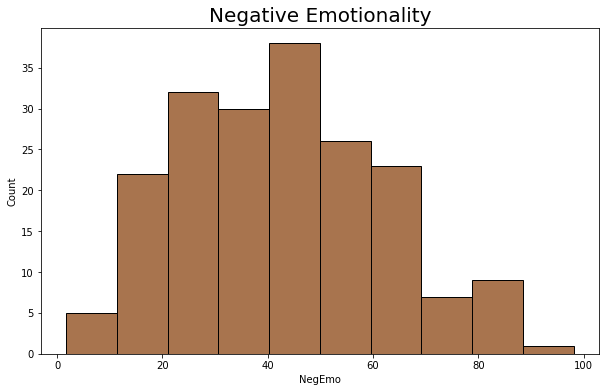

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['NegEmo'], color='saddlebrown', bins=10)
plt.title('Negative Emotionality',fontsize=20)

Text(0.5, 0.98, 'Negative Emotionality')

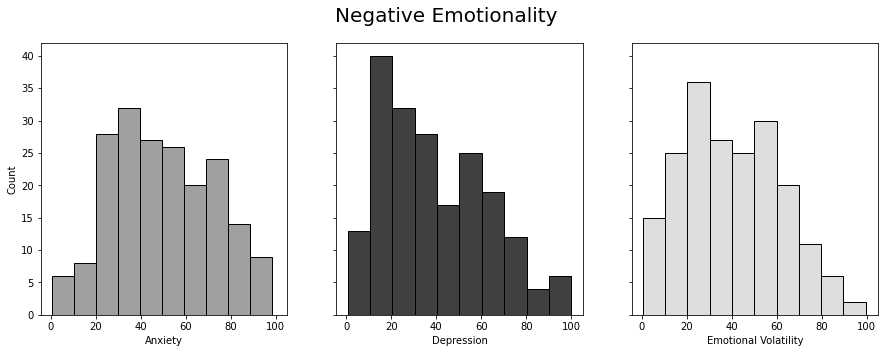

In [98]:
fig, axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(15,5))
sns.histplot(data=data, x=data['NegEmo_Anx'], ax=axs[0], color='grey', bins=10,)
axs[0].set(xlabel="Anxiety", ylabel = "Count")

sns.histplot(data=data, x=data['NegEmo_Dep'], ax=axs[1], color='black', bins=10)
axs[1].set(xlabel="Depression")
plt.suptitle('Depression',fontsize=20)

sns.histplot(data=data, x=data['NegEmo_EVo'], ax=axs[2], color='lightgrey', bins=10)
axs[2].set(xlabel="Emotional Volatility")

plt.suptitle('Negative Emotionality',fontsize=20)

In [99]:
negative_emotionality = data[['NegEmo', 'NegEmo_Anx', 'NegEmo_Dep', 'NegEmo_EVo']]
negative_emotionality.corr()

NegEmo  NegEmo_Anx  NegEmo_Dep  NegEmo_EVo
NegEmo      1.000000    0.880506    0.875019    0.843724
NegEmo_Anx  0.880506    1.000000    0.667282    0.618616
NegEmo_Dep  0.875019    0.667282    1.000000    0.598315
NegEmo_EVo  0.843724    0.618616    0.598315    1.000000

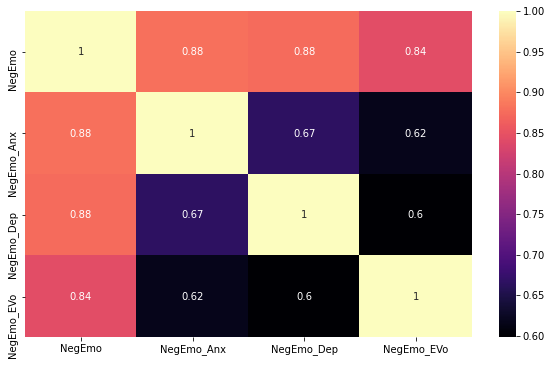

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(negative_emotionality.corr(), cmap="magma", annot=True)

**Open-Mindedness**

- Intellectual Curiosity:  
- Aesthetic Sensitivity: 
- Creative Imagination: 

Text(0.5, 1.0, 'Open-Mindedness')

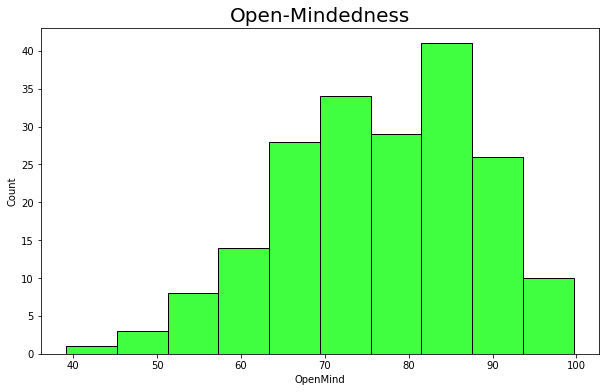

In [101]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['OpenMind'], color='lime', bins=10)
plt.title('Open-Mindedness',fontsize=20)

Text(0.5, 0.98, 'Open-Mindedness')

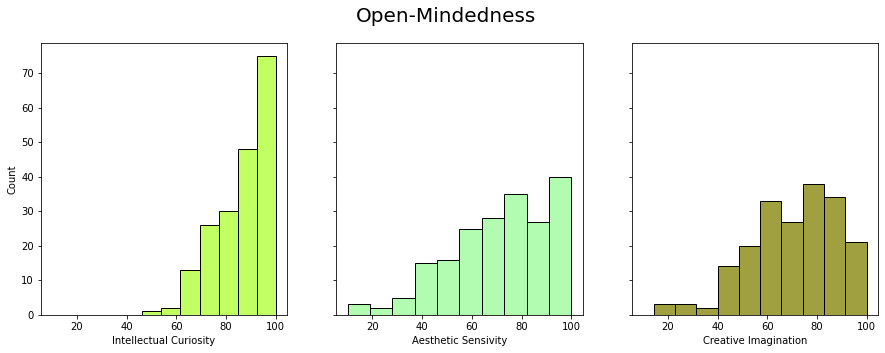

In [102]:
fig, axs = plt.subplots(1,3,sharey=True, sharex=True, figsize=(15,5))
sns.histplot(data=data, x=data['OpenMind_Int'], ax=axs[0], color='greenyellow', bins=7)
axs[0].set(xlabel="Intellectual Curiosity", ylabel = "Count")

sns.histplot(data=data, x=data['OpenMind_Aes'], ax=axs[1], color='palegreen', bins=10)
axs[1].set(xlabel="Aesthetic Sensivity")

sns.histplot(data=data, x=data['OpenMind_CrI'], ax=axs[2], color='olive', bins=10)
axs[2].set(xlabel="Creative Imagination")

plt.suptitle('Open-Mindedness',fontsize=20)

In [103]:
open_mindedness = data[['OpenMind', 'OpenMind_Int', 'OpenMind_Aes', 'OpenMind_CrI']]
open_mindedness.corr()

OpenMind  OpenMind_Int  OpenMind_Aes  OpenMind_CrI
OpenMind      1.000000      0.605804      0.784650      0.760535
OpenMind_Int  0.605804      1.000000      0.251689      0.340504
OpenMind_Aes  0.784650      0.251689      1.000000      0.295658
OpenMind_CrI  0.760535      0.340504      0.295658      1.000000

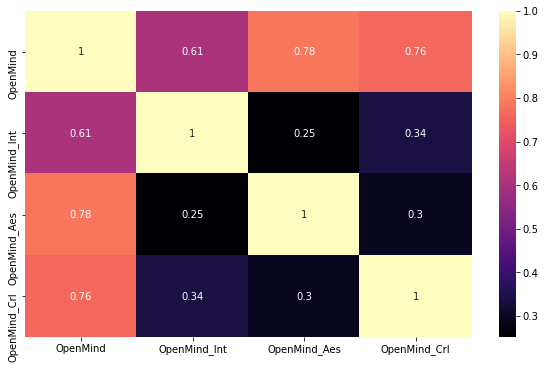

In [104]:
plt.figure(figsize=(10,6))
sns.heatmap(open_mindedness.corr(), cmap="magma", annot=True)

## Brief Wisdom Screening Scale

A “Brief Wisdom Screening Scale” is introduced that contains those 20 items from the three self-report scales that were most highly correlated with the common factor across the scales.

[How to measure wisdom: content, reliability, and validity of five measures](https://www.frontiersin.org/articles/10.3389/fpsyg.2013.00405/full#:~:text=The%20brief%20wisdom%20screening%20scale,was%20used%20as%20BWSS%20score.)

Text(0.5, 1.0, 'Brief Wisdom Screening Scale')

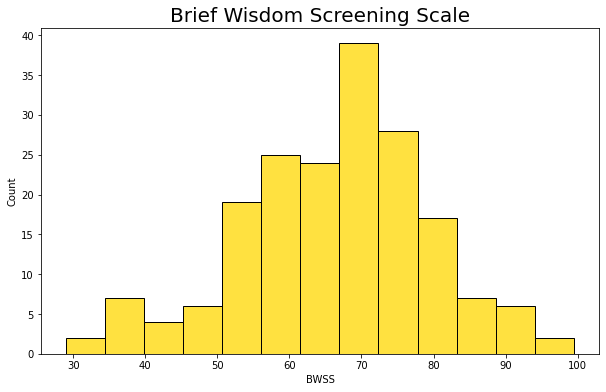

In [105]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['BWSS'], color='gold')
plt.title('Brief Wisdom Screening Scale',fontsize=20)

In [106]:
bwss = data['BWSS']

## DAS-A-17

The DAS-A-17 is a short-version of the Dysfunctional Attitude Scale, a 40-item self-report scale designed to measure the presence and intensity of dysfunctional beliefs (de Graaf et al. 2009 ). Participants rate statements of beliefs.

[Measuring Dysfunctional Attitudes in the General Population: The Dysfunctional Attitude Scale (form A) Revised](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2712063/)

Text(0.5, 1.0, 'Dysfunctional Attitude Scale')

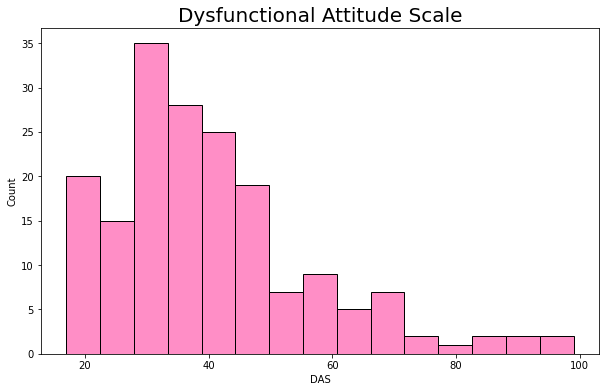

In [107]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x=data['DAS'], color='hotpink')
plt.title('Dysfunctional Attitude Scale',fontsize=20)

Text(0.5, 0.98, 'Dysfunctional Attitude Scale')

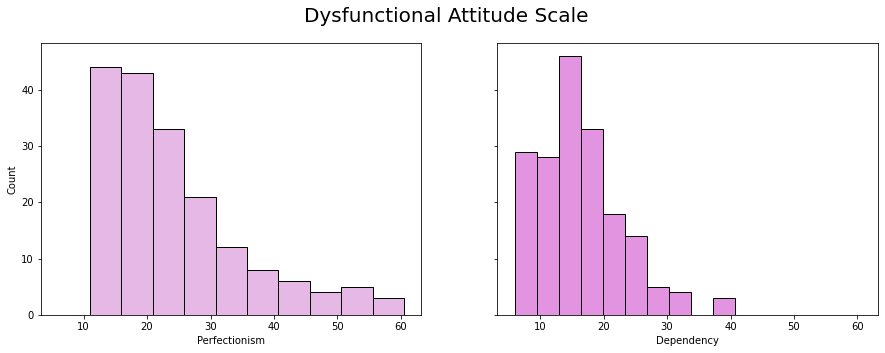

In [108]:
fig, axs = plt.subplots(1,2,sharey=True, sharex=True, figsize=(15,5))

sns.histplot(data=data, x=data['DAS_Pft'], ax=axs[0], color='plum', bins=10)
axs[0].set(xlabel="Perfectionism")

sns.histplot(data=data, x=data['DAS_Dep'], ax=axs[1], color='orchid', bins=10)
axs[1].set(xlabel="Dependency", ylabel = "Count")

plt.suptitle('Dysfunctional Attitude Scale',fontsize=20)

In [109]:
das = data[['DAS', 'DAS_Pft', 'DAS_Dep']]
das.corr()

DAS   DAS_Pft   DAS_Dep
DAS      1.000000  0.951973  0.869463
DAS_Pft  0.951973  1.000000  0.676453
DAS_Dep  0.869463  0.676453  1.000000

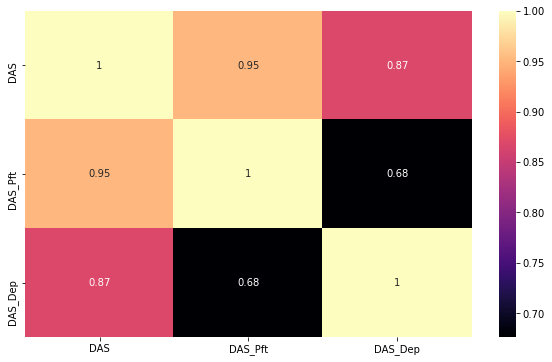

In [110]:
plt.figure(figsize=(10,6))
sns.heatmap(das.corr(), cmap="magma", annot=True)

In [111]:
characteristics = data[['NegEmo','OpenMind', 'BWSS', 'DAS']]
characteristics.corr()

NegEmo  OpenMind      BWSS       DAS
NegEmo    1.000000 -0.208270 -0.573812  0.486012
OpenMind -0.208270  1.000000  0.361179 -0.177853
BWSS     -0.573812  0.361179  1.000000 -0.488763
DAS       0.486012 -0.177853 -0.488763  1.000000

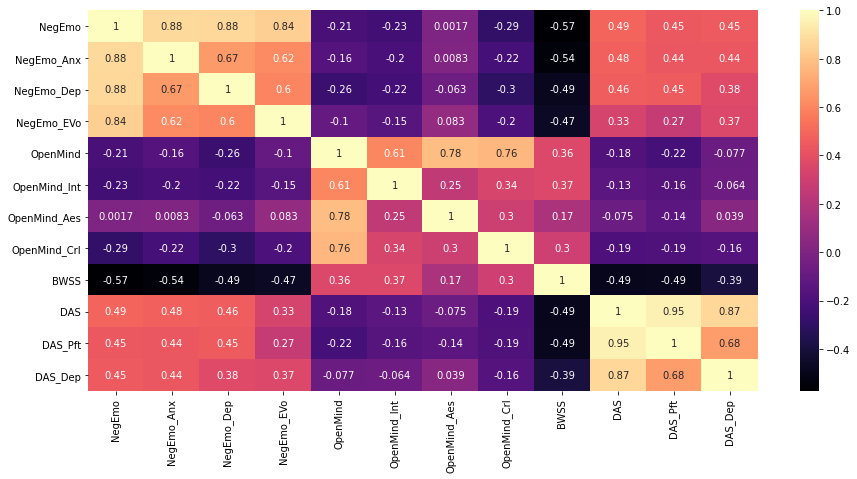

In [112]:
all_characteristics = data[['NegEmo', 'NegEmo_Anx', 'NegEmo_Dep', 'NegEmo_EVo',
                            'OpenMind', 'OpenMind_Int', 'OpenMind_Aes', 'OpenMind_CrI', 
                            'BWSS', 
                            'DAS', 'DAS_Pft', 'DAS_Dep',
                            ]]
plt.figure(figsize=(15,7))
sns.heatmap(all_characteristics.corr(), cmap='magma', annot=True)

## Benefits and Drawbacks

Let's go with the most important data about microdosing, that is the reported benefits and drawbacks per user. Respondents were asked to fill in 3 benefits or "pros", and 3 drawbacks or "cons". Each characteristic is ranked from 0 (Not at all important) to 100 (Extremely important).

**Benefits**

In [117]:
data['ProCode1'].value_counts()

Improved Mood                    46
Improved Focus                   32
Improved Energy                  28
Creativity                       27
Reduced Depression               19
Improved Motivation              10
Clarity of Thought               10
Mindful Presence                 10
Reduced Anxiety                   9
Sociability                       7
Introspection                     6
Emotional Intelligence            5
Improved Productivity             5
Cognitive Enhancement             5
Wakefulness                       5
Calm                              5
Confidence                        4
Heightened Awareness              4
Perspective Shifting              4
Alertness                         3
Improved Senses                   3
Openness                          3
Spirituality                      3
Appreciation                      3
Reduced Stress                    3
Engagement                        3
Sleep                             2
Empathy                     

In [118]:
pros = data['ProCode1'].value_counts()+data['ProCode2'].value_counts()+data['ProCode1'].value_counts()
pros.sort_values(ascending=False)

Improved Mood                    117.0
Improved Focus                    94.0
Improved Energy                   77.0
Creativity                        71.0
Reduced Depression                50.0
Improved Motivation               30.0
Reduced Anxiety                   30.0
Clarity of Thought                29.0
Mindful Presence                  23.0
Sociability                       22.0
Cognitive Enhancement             22.0
Empathy                           17.0
Perspective Shifting              17.0
Calm                              16.0
Improved Productivity             16.0
Emotional Intelligence            15.0
Confidence                        14.0
Wakefulness                       14.0
Introspection                     13.0
Spirituality                      13.0
Appreciation                      13.0
Heightened Awareness              12.0
Alertness                         12.0
Engagement                        11.0
Openness                           9.0
Connection               

In [119]:
pros.sort_values(ascending=False)/276*100

Improved Mood                    42.391304
Improved Focus                   34.057971
Improved Energy                  27.898551
Creativity                       25.724638
Reduced Depression               18.115942
Improved Motivation              10.869565
Reduced Anxiety                  10.869565
Clarity of Thought               10.507246
Mindful Presence                  8.333333
Sociability                       7.971014
Cognitive Enhancement             7.971014
Empathy                           6.159420
Perspective Shifting              6.159420
Calm                              5.797101
Improved Productivity             5.797101
Emotional Intelligence            5.434783
Confidence                        5.072464
Wakefulness                       5.072464
Introspection                     4.710145
Spirituality                      4.710145
Appreciation                      4.710145
Heightened Awareness              4.347826
Alertness                         4.347826
Engagement 

In [120]:
data['ProCode1'].values

array(['Introspection', 'Creativity', 'Improved Energy',
       'Clarity of Thought', 'Creativity', 'Improved Focus', 'Confidence',
       'Improved Mood', 'Improved Mood', 'Mindful Presence',
       'Lack of Side-Effects', 'Improved Focus', 'Improved Mood',
       'Improved Motivation', 'Reduced Depression', 'Improved Senses',
       'Improved Communication Skills', 'Alertness', 'Improved Focus',
       'Novelty', 'Connection', 'Improved Motivation', 'Spirituality',
       'Improved Energy', 'Improved Energy', 'Reduced Anxiety',
       'Improved Mood', 'Improved Focus', 'Improved Mood',
       'Cognitive Enhancement', 'Improved Focus', 'Reduced Anxiety',
       'Improved Mood', 'Creativity', 'Improved Motivation',
       'Clarity of Thought', 'Improved Mood', 'Improved Energy',
       'Emotional Intelligence', 'Cognitive Enhancement',
       'Improved Energy', 'Empathy', 'Improved Focus',
       'Reduced Depression', 'Engagement', 'Improved Senses',
       'Improved Motivation', 'Impr

Text(0.5, 1.0, 'First Benefit')

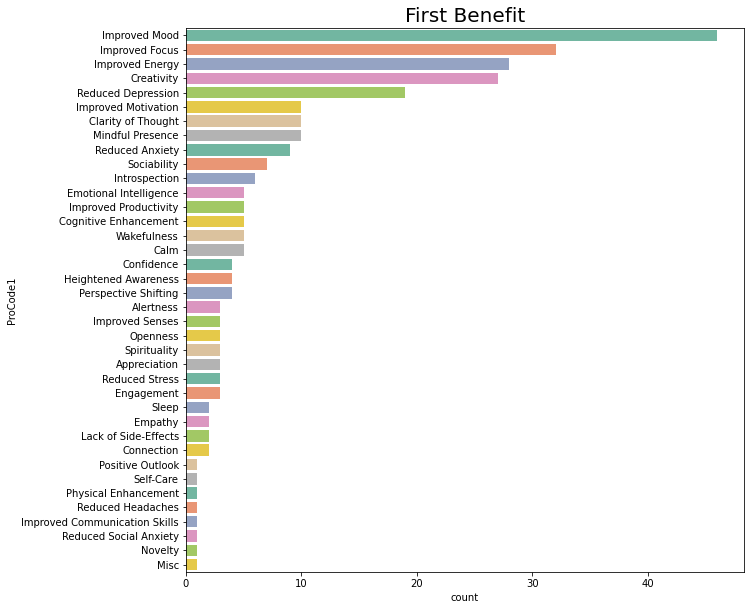

In [121]:
plt.figure(figsize=(10,10))

order_ranked = data['ProCode1'].value_counts().index
sns.countplot(data=data, y=data['ProCode1'], order=order_ranked, palette='Set2')

plt.title('First Benefit',fontsize=20)

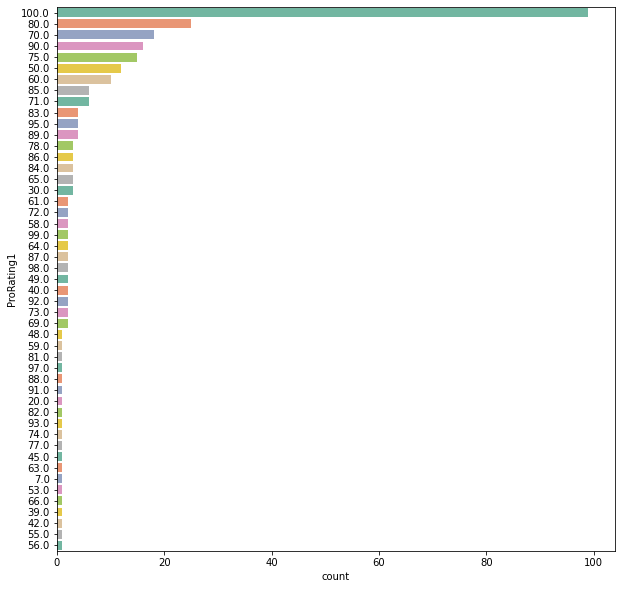

In [122]:
plt.figure(figsize=(10,10))
order_ranked = data['ProRating1'].value_counts().index
sns.countplot(data=data, y='ProRating1', order=order_ranked, palette='Set2')

In [123]:
def pro_mean(df, code):
    
    ''' Return the mean per each procode in the same order 
    as its popularity'''

    scores = []
    if code == 'ProCode1':
        rating = 'ProRating1'
    elif code == 'ProCode2':
        rating = 'ProRating2'
    elif code == 'ProCode3':
        rating = 'ProRating3'
    index_list = df[code].value_counts().index
    for i in index_list:
        score = df[df[code] == i][rating].mean()
        scores.append(score)
    return scores

In [124]:
scores1 = pro_mean(data, 'ProCode1')
scores2 = pro_mean(data, 'ProCode2')
scores3 = pro_mean(data, 'ProCode3')

In [126]:
df1 = pd.DataFrame({'Benefit': data['ProCode1'].value_counts().index, 'Average Score 1': scores1})
df2 = pd.DataFrame({'Benefit': data['ProCode2'].value_counts().index, 'Average Score 2': scores2})
df3 = pd.DataFrame({'Benefit': data['ProCode3'].value_counts().index, 'Average Score 3': scores3})

In [127]:
#wide = pd.concat([df1,df2,df3], axis=1, join='inner')
benefits = df1.merge(df2, on= 'Benefit')
benefits = benefits.merge(df3, on = 'Benefit')
benefits['Average Score'] = (benefits['Average Score 1']+benefits['Average Score 1']+benefits['Average Score 1'])/3
benefits

Benefit  Average Score 1  Average Score 2  \
0                   Improved Mood        86.369565        80.600000   
1                  Improved Focus        78.593750        84.933333   
2                 Improved Energy        75.035714        70.047619   
3                      Creativity        73.888889        74.529412   
4              Reduced Depression        95.421053        90.250000   
5             Improved Motivation        88.900000        81.200000   
6              Clarity of Thought        79.800000        81.888889   
7                Mindful Presence        88.200000        78.333333   
8                 Reduced Anxiety        90.555556        91.416667   
9                     Sociability        82.714286        72.750000   
10                  Introspection        84.166667       100.000000   
11         Emotional Intelligence        93.200000        72.200000   
12          Improved Productivity        75.600000        71.666667   
13          Cognitive Enhancement        96.400000        83.333333   
14                           Calm        66.000000        81.000000   
15                     Confidence        86.250000        94.666667   
16           Heightened Awareness        74.250000        74.000000   
17           Perspective Shifting        77.500000        87.777778   
18                      Alertness        63.333333        76.500000   
19                Improved Senses        63.333333        29.000000   
20                       Openness        85.333333        91.666667   
21                   Spirituality        96.666667        73.714286   
22                   Appreciation        84.000000        84.285714   
23                 Reduced Stress        64.333333        86.000000   
24                     Engagement        86.666667        73.400000   
25                          Sleep        94.500000        60.000000   
26                        Empathy       100.000000        69.384615   
27                     Connection        84.000000        81.333333   
28               Positive Outlook        89.000000        80.000000   
29                      Self-Care       100.000000        75.666667   
30           Physical Enhancement        91.000000        83.000000   
31  Improved Communication Skills        80.000000        87.000000   
32         Reduced Social Anxiety       100.000000        87.500000   
33                        Novelty        71.000000        91.666667   
34                           Misc        50.000000       100.000000   

    Average Score 3  Average Score  
0         74.075000      86.369565  
1         66.750000      78.593750  
2         63.764706      75.035714  
3         77.343750      73.888889  
4         81.833333      95.421053  
5         70.600000      88.900000  
6         81.250000      79.800000  
7         36.000000      88.200000  
8         78.857143      90.555556  
9         78.307692      82.714286  
10        82.800000      84.166667  
11        75.750000      93.200000  
12        62.857143      75.600000  
13        85.000000      96.400000  
14        79.111111      66.000000  
15        90.000000      86.250000  
16        81.333333      74.250000  
17        56.666667      77.500000  
18        68.000000      63.333333  
19        69.750000      63.333333  
20        75.166667      85.333333  
21        75.000000      96.666667  
22        55.000000      84.000000  
23       100.000000      64.333333  
24        65.000000      86.666667  
25        69.333333      94.500000  
26        85.000000     100.000000  
27        79.000000      84.000000  
28        64.000000      89.000000  
29        71.750000     100.000000  
30        66.250000      91.000000  
31       100.000000      80.000000  
32        90.000000     100.000000  
33        79.750000      71.000000  
34        44.000000      50.000000

Text(0.5, 1.0, 'Average Score with the most reported Benefits')

<Figure size 720x720 with 0 Axes>

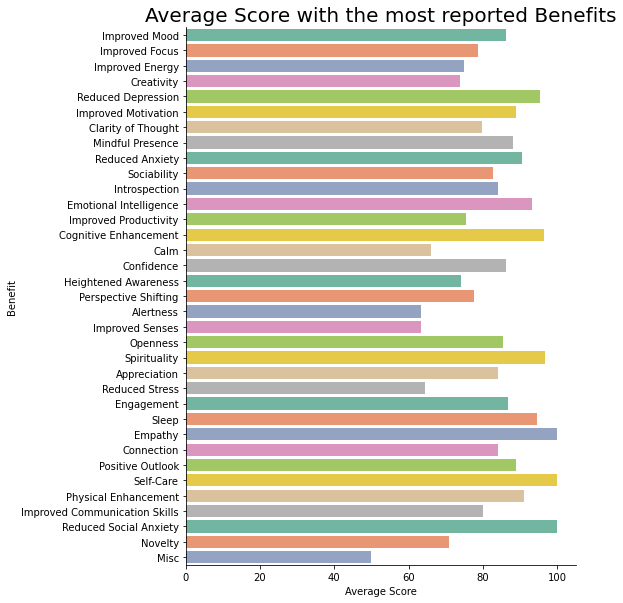

In [128]:
plt.figure(figsize=(10,10))
g = sns.catplot(data=benefits, kind="bar", y="Benefit", x="Average Score",
                palette="Set2", height=8)
plt.title('Average Score with the most reported Benefits',fontsize=20)

In [37]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [134]:
from os import path
from PIL import Image

In [85]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [159]:
show = data['ProCode1'].append(data['ProCode2'], ignore_index=True)
show = show.append(data['ProCode3'], ignore_index=True)
pros = show.values
pros = pros[~pd.isnull(pros)]
pros = pros.tolist()
str1 = ''.join(pros)
#listToString(x)

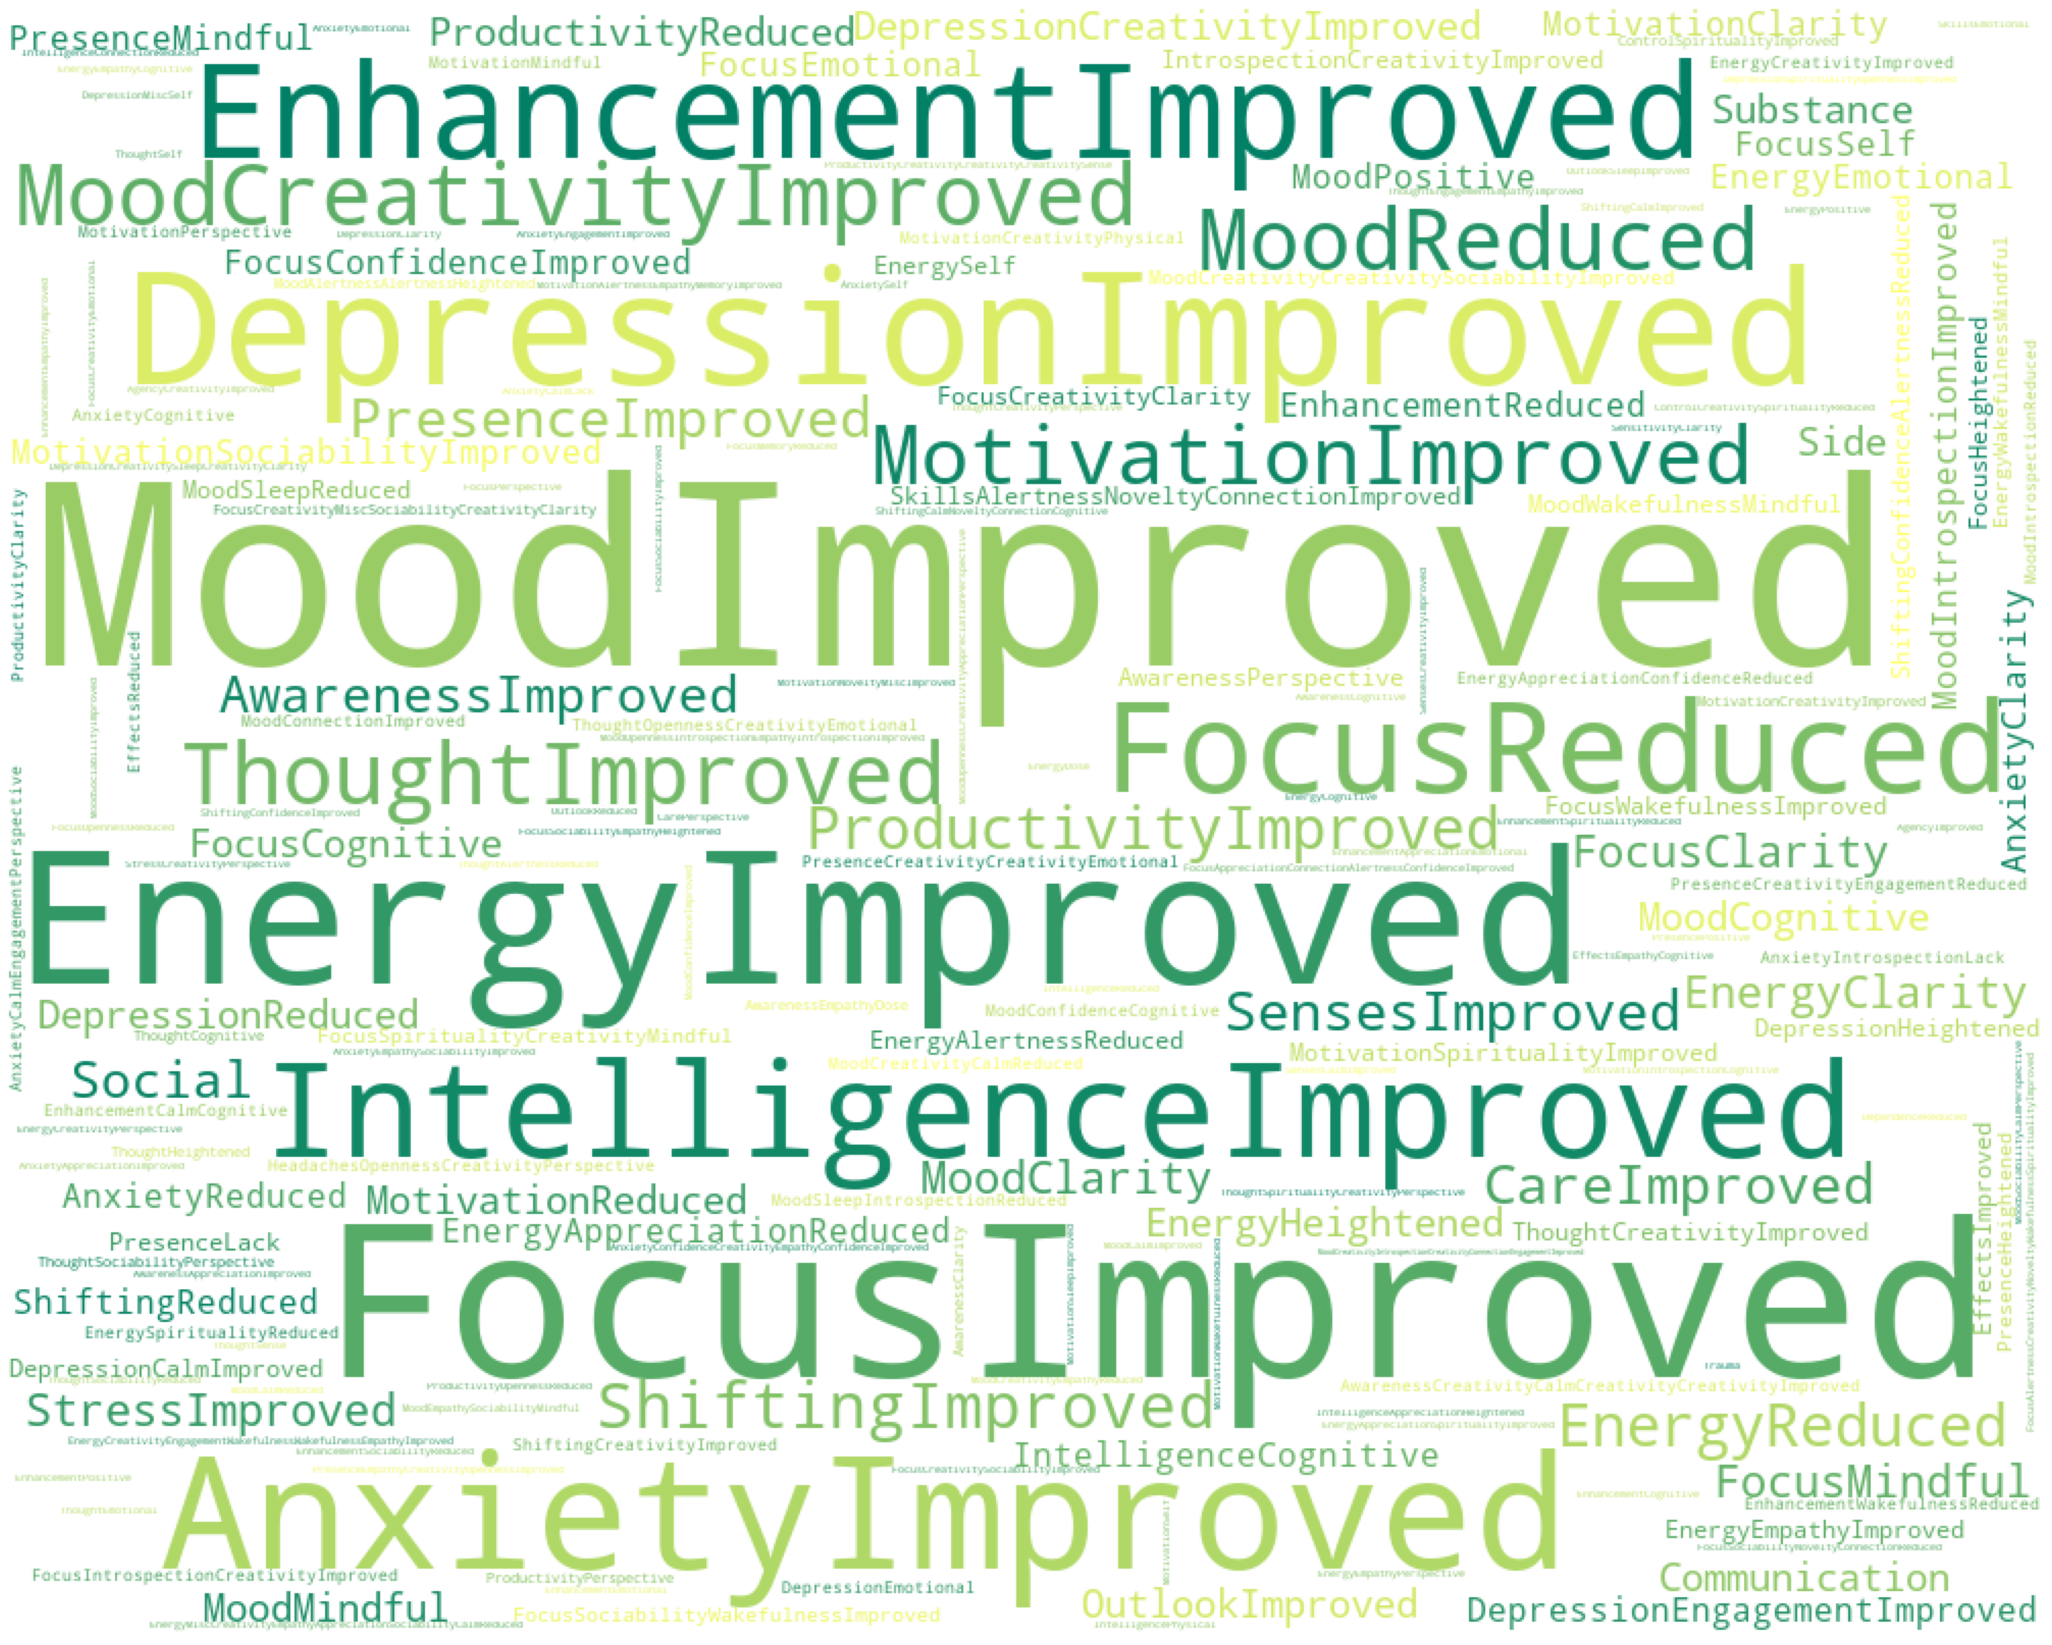

In [160]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='white', colormap='summer',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

In [161]:
wordcloud.to_file("Benefits_cloud.png")

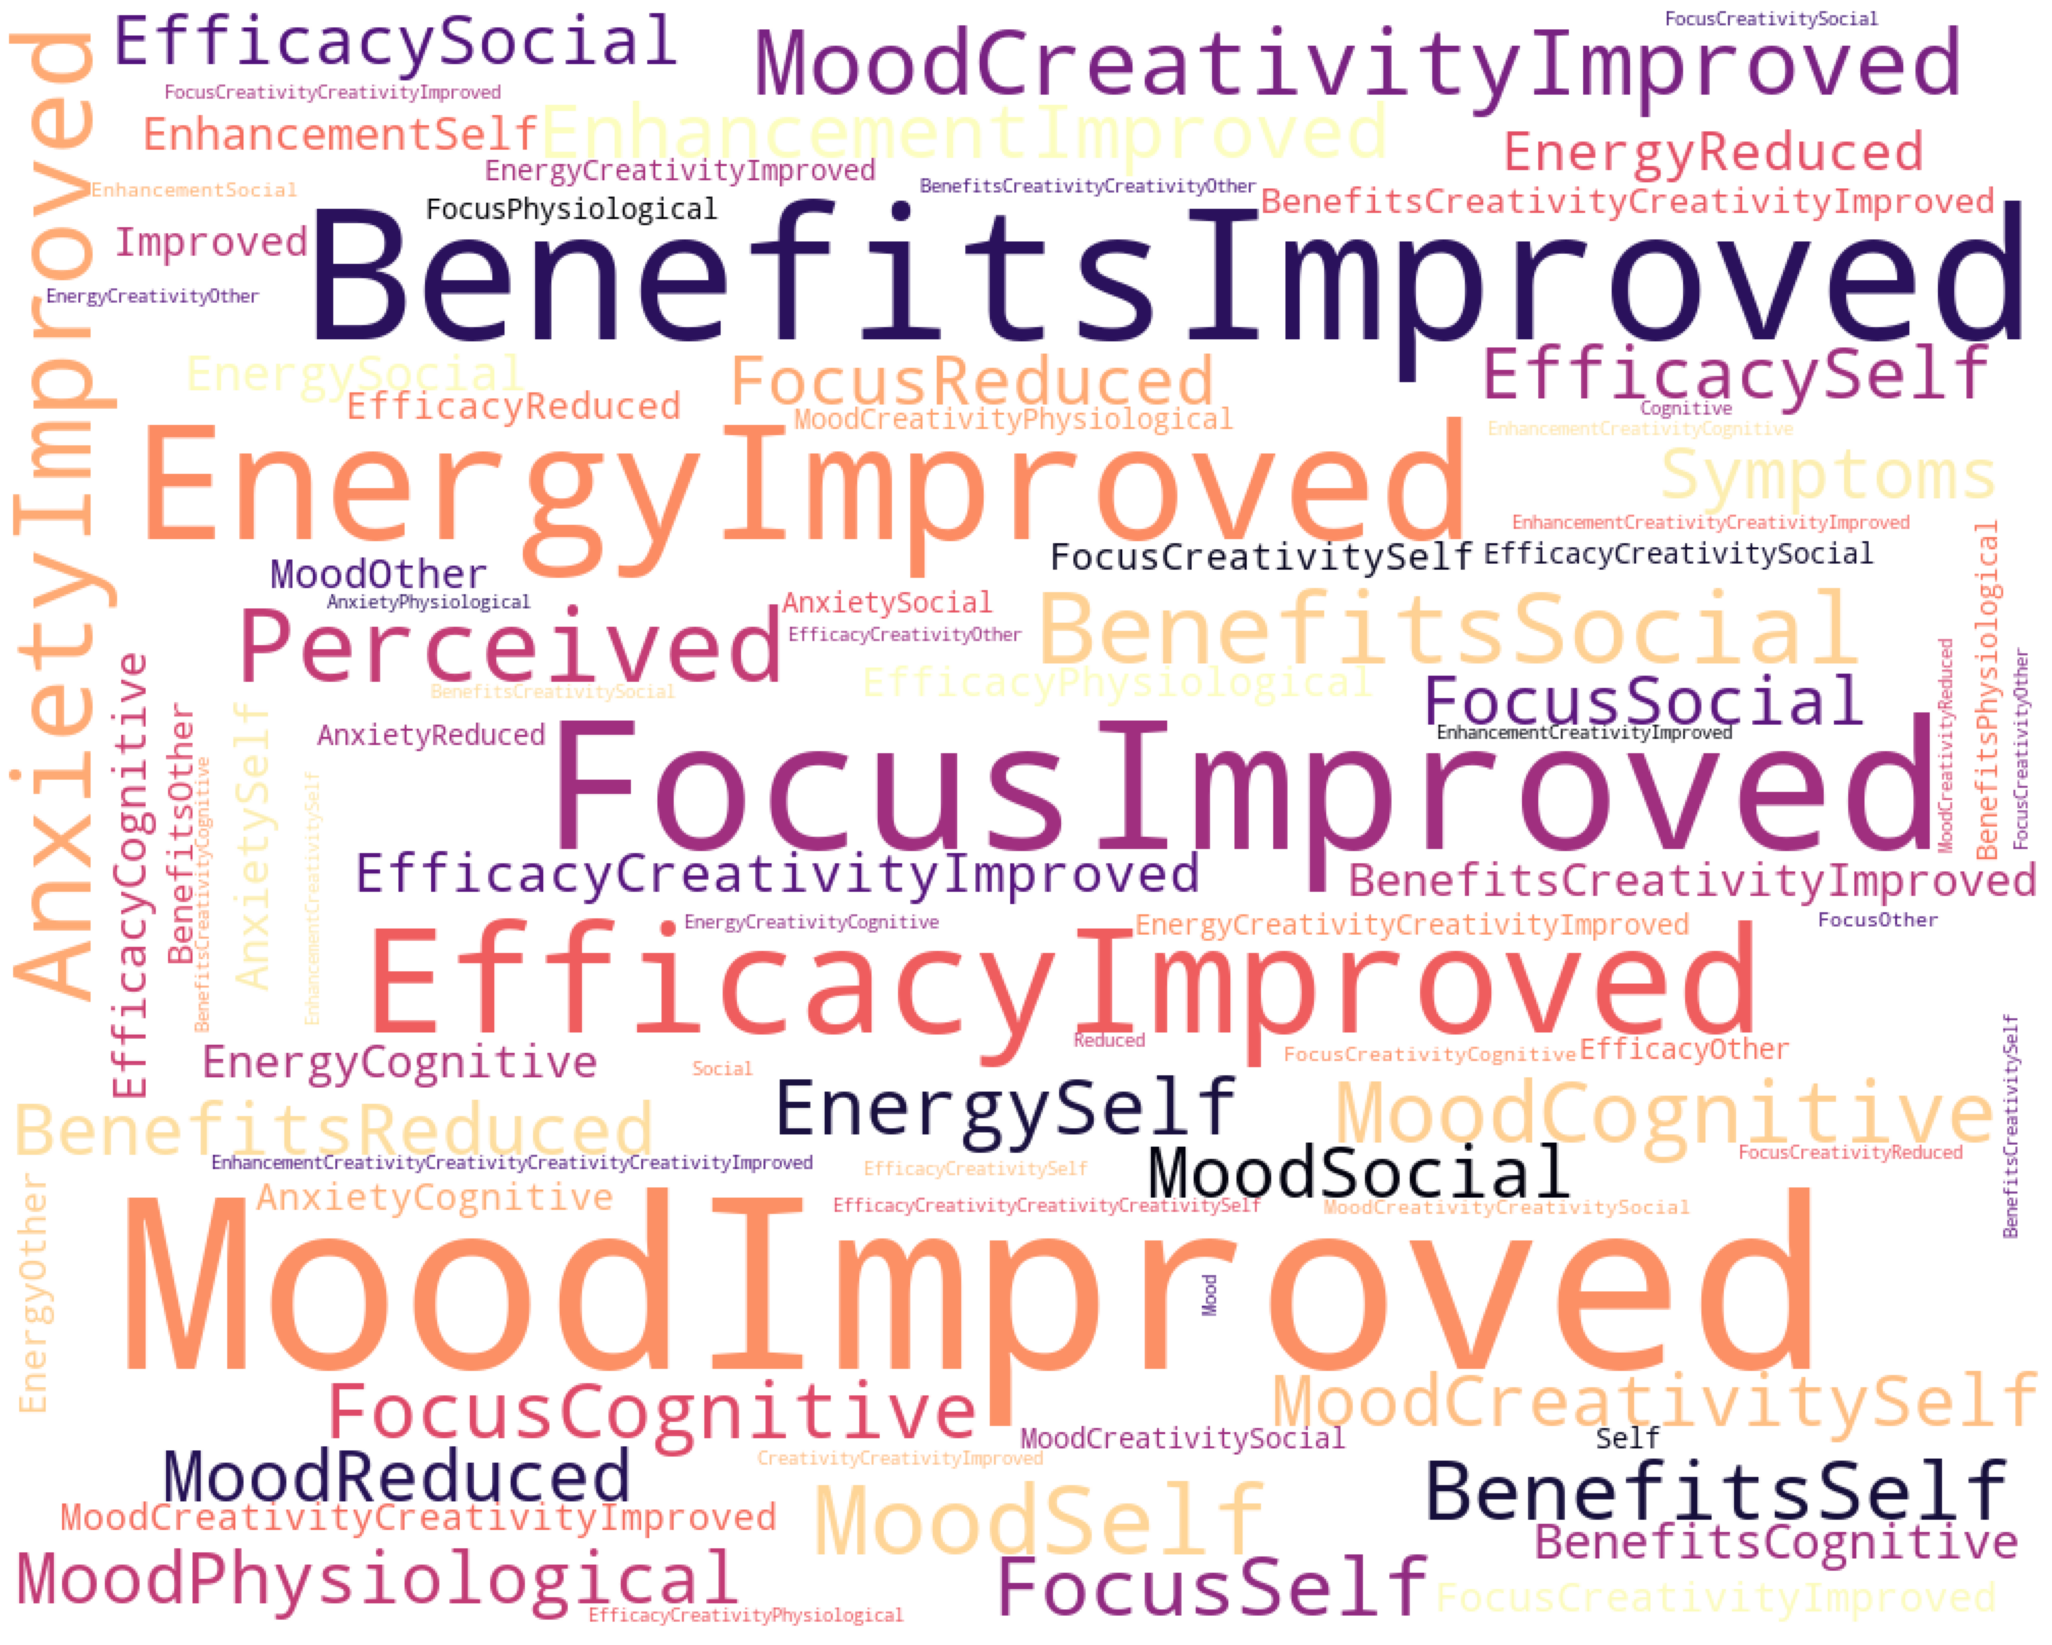

In [117]:
show = data['ProCategory1'].append(data['ProCategory2'], ignore_index=True)
show = show.append(data['ProCategory3'], ignore_index=True)
pros = show.values
pros = pros[~pd.isnull(pros)]
pros = pros.tolist()
str1 = ''.join(pros)
#listToString(x)

wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='white', colormap='magma',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

**Drawbacks**

In [129]:
data['ConCode1'].value_counts()

Illegality                      29
Anxiety                         24
Poor Focus                      21
Dose Accuracy                   19
Body Discomfort                 15
Restlessness                    13
Stigma                          12
Sleep Disturbances              11
GI Issues                       11
Tolerance                        8
Unknown Risk-Effect Profile      8
Unusualness                      6
Psychological Dependence         6
Decreased Appetite               5
Comedown                         5
Social Anxiety                   5
Emotional Instability            4
Memory                           4
Misc                             4
Emotional Depth                  4
Fatigue                          4
Substance Availability           3
Headache                         3
Preparation                      3
Financial Cost                   3
Irritability                     3
Duration Concerns                2
Racing Thoughts                  2
Negative Emotionalit

In [130]:
cons = data['ConCode1'].value_counts()+data['ConCode2'].value_counts()+data['ConCode3'].value_counts()
cons.sort_values(ascending=False)

Illegality                      64.0
Poor Focus                      58.0
Dose Accuracy                   48.0
Restlessness                    33.0
Anxiety                         33.0
Stigma                          32.0
Body Discomfort                 29.0
Sleep Disturbances              27.0
Unknown Risk-Effect Profile     24.0
GI Issues                       22.0
Misc                            16.0
Psychological Dependence        15.0
Substance Availability          14.0
Decreased Appetite              14.0
Emotional Instability           12.0
Financial Cost                  11.0
Social Overengagement           10.0
Unusualness                      9.0
Preparation                      9.0
Emotional Depth                  8.0
Social Anxiety                   8.0
Headache                         8.0
Fatigue                          8.0
Visual Effects                   7.0
Irritability                     7.0
Negative Emotionality            6.0
Dissociation                     6.0
R

In [131]:
cons.sort_values(ascending=False)/276*100

Illegality                      23.188406
Poor Focus                      21.014493
Dose Accuracy                   17.391304
Restlessness                    11.956522
Anxiety                         11.956522
Stigma                          11.594203
Body Discomfort                 10.507246
Sleep Disturbances               9.782609
Unknown Risk-Effect Profile      8.695652
GI Issues                        7.971014
Misc                             5.797101
Psychological Dependence         5.434783
Substance Availability           5.072464
Decreased Appetite               5.072464
Emotional Instability            4.347826
Financial Cost                   3.985507
Social Overengagement            3.623188
Unusualness                      3.260870
Preparation                      3.260870
Emotional Depth                  2.898551
Social Anxiety                   2.898551
Headache                         2.898551
Fatigue                          2.898551
Visual Effects                   2

Text(0.5, 1.0, 'First Drawback')

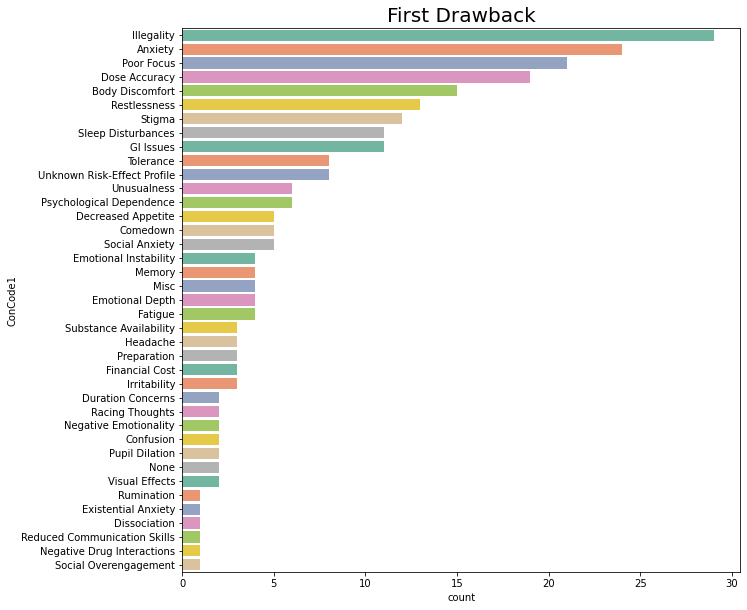

In [132]:
plt.figure(figsize=(10,10))

order_ranked = data['ConCode1'].value_counts().index
sns.countplot(data=data, y=data['ConCode1'], order=order_ranked, palette='Set2')

plt.title('First Drawback',fontsize=20)

In [133]:
def con_mean(df, code):
    
    ''' Return the mean per each concode in the same order 
    as its popularity'''

    scores = []
    if code == 'ConCode1':
        rating = 'ConRating1'
    elif code == 'ConCode2':
        rating = 'ConRating2'
    elif code == 'ConCode3':
        rating = 'ConRating3'
    index_list = df[code].value_counts().index
    for i in index_list:
        score = df[df[code] == i][rating].mean()
        scores.append(score)
    return scores

In [134]:
scores1 = con_mean(data, 'ConCode1')
scores2 = con_mean(data, 'ConCode2')
scores3 = con_mean(data, 'ConCode3')

df1 = pd.DataFrame({'Drawback': data['ConCode1'].value_counts().index, 'Average Score 1': scores1})
df2 = pd.DataFrame({'Drawback': data['ConCode2'].value_counts().index, 'Average Score 2': scores2})
df3 = pd.DataFrame({'Drawback': data['ConCode3'].value_counts().index, 'Average Score 3': scores3})

In [135]:
drawbacks = df1.merge(df2, on= 'Drawback')
drawbacks = drawbacks.merge(df3, on = 'Drawback')
drawbacks['Average Score'] = (drawbacks['Average Score 1']+drawbacks['Average Score 1']+drawbacks['Average Score 1'])/3

Text(0.5, 1.0, 'Average Score with the most reported Benefits')

<Figure size 720x720 with 0 Axes>

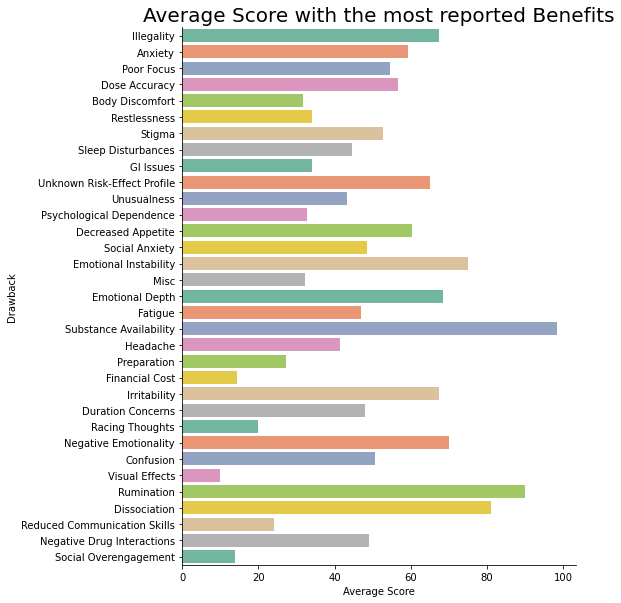

In [136]:
plt.figure(figsize=(10,10))
g = sns.catplot(data=drawbacks, kind="bar", y="Drawback", x="Average Score",
                palette="Set2", height=8)
plt.title('Average Score with the most reported Benefits',fontsize=20)

In [151]:
show = data['ConCode1'].append(data['ConCode2'], ignore_index=True)
show = show.append(data['ConCode3'], ignore_index=True)
cons = show.values
cons = cons[~pd.isnull(cons)]
cons = cons.tolist()
str1 = ''.join(cons)
#listToString(x)

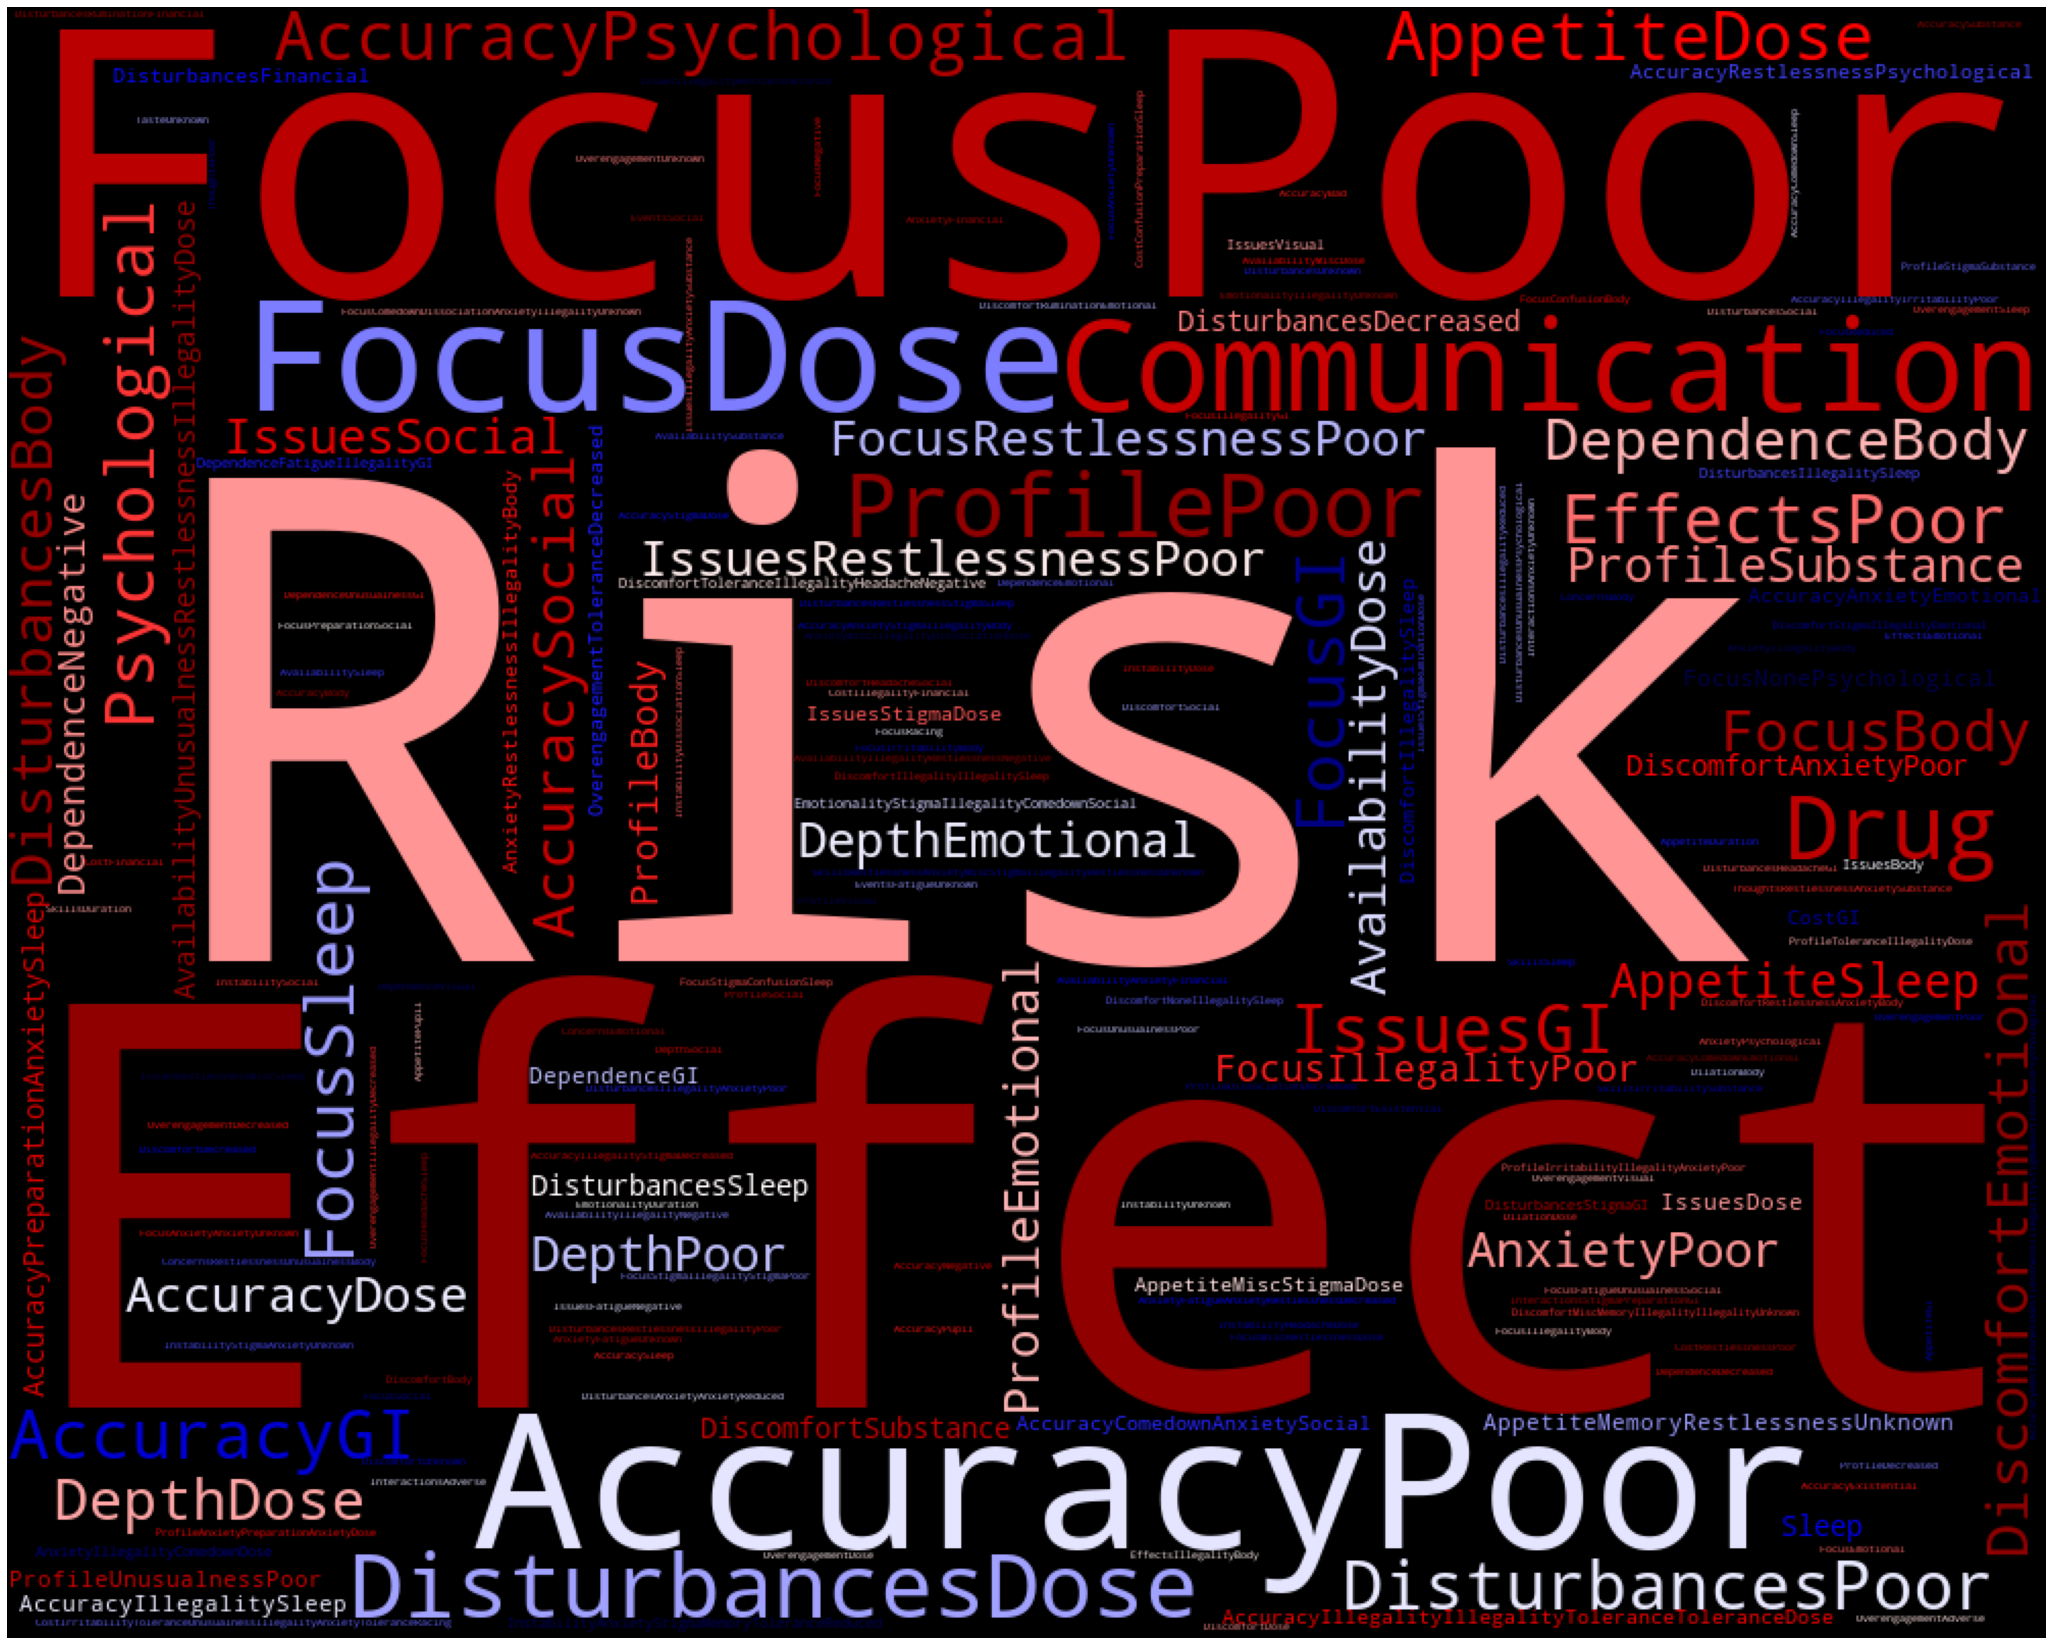

In [153]:
wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='black', colormap='seismic',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

In [154]:
wordcloud.to_file("Drawbacks_cloud.png")

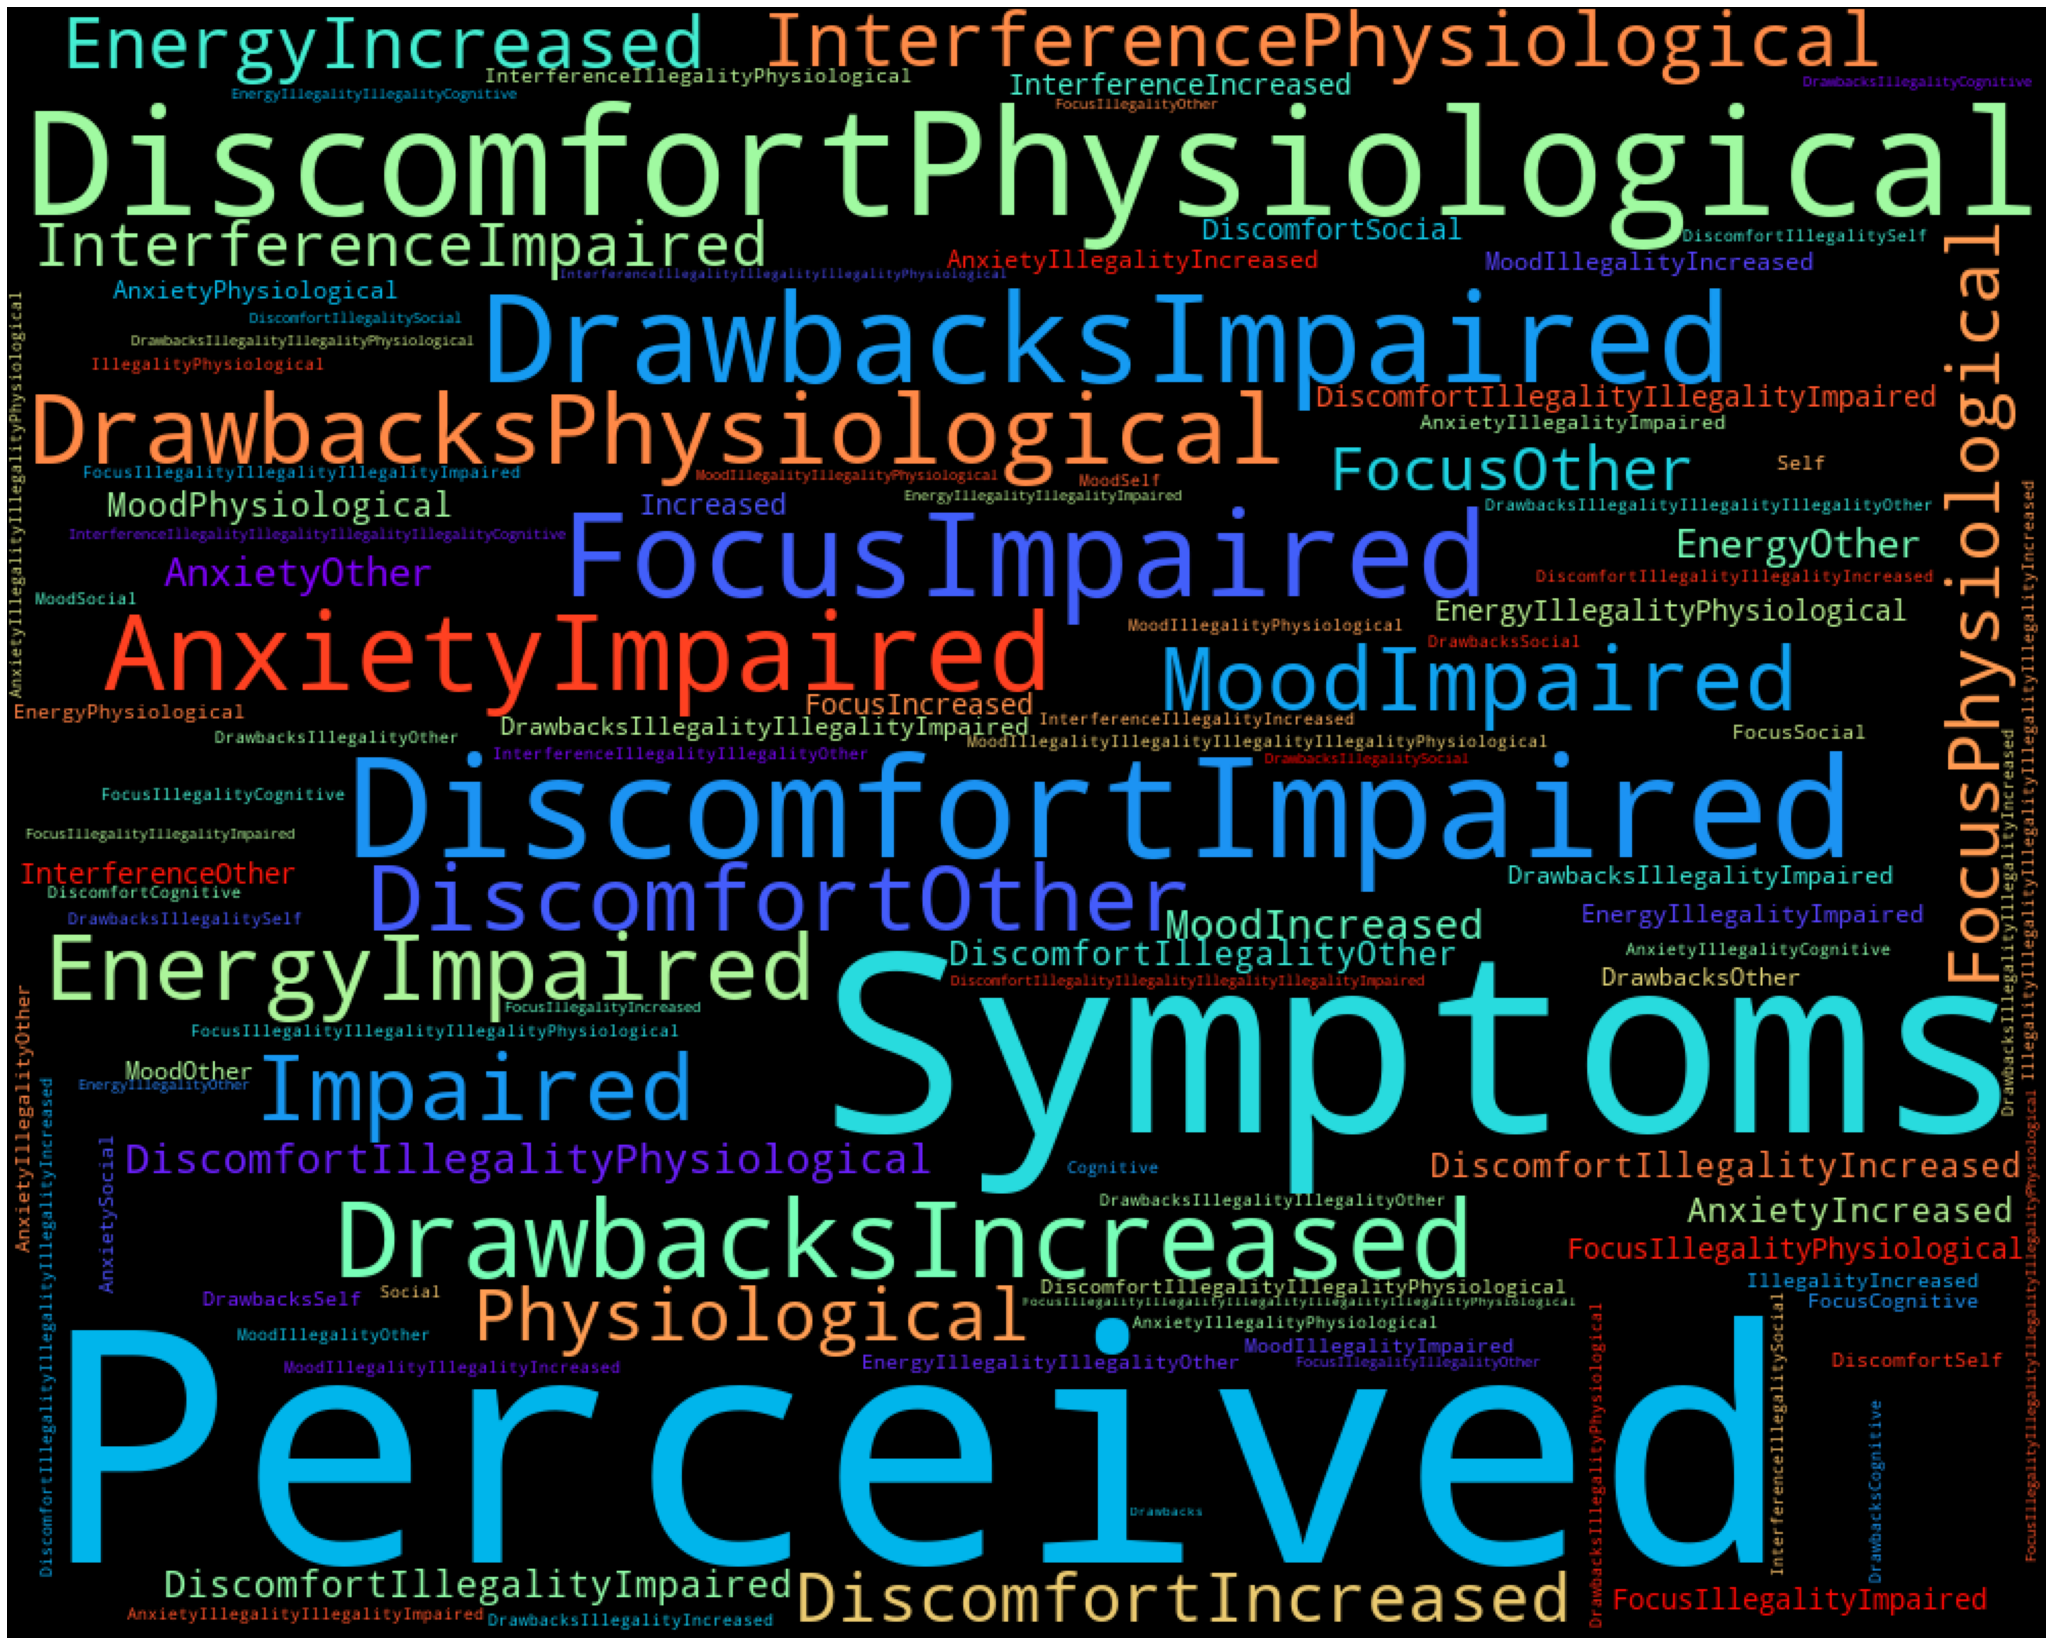

In [125]:
show = data['ConCategory1'].append(data['ConCategory2'], ignore_index=True)
show = show.append(data['ConCategory3'], ignore_index=True)
cons = show.values
cons = cons[~pd.isnull(cons)]
cons = cons.tolist()
str1 = ''.join(cons)
#listToString(x)

wordcloud = WordCloud(width = 1000, height = 800,
                      background_color='black', colormap='rainbow',
                      collocations=False, stopwords = STOPWORDS).generate(str1)
plot_cloud(wordcloud)

**As a result of microdosing have you noticed any improvements in your experiences of the following?**

In [141]:
print(f"Mood: {sum(data['ImpMood']==1)}")
print(f"Anxiety: {sum(data['ImpAnxiety']==1)}")
print(f"Meditative practice: {sum(data['ImpMeditative']==1)}")
print(f"Eating habits: {sum(data['ImpEating']==1)}")
print(f"Sleep: {sum(data['ImpSleep']==1)}")
print(f"Exercise: {sum(data['ImpExercise']==1)}")

Mood: 248
Anxiety: 158
Meditative practice: 131
Eating habits: 96
Sleep: 77
Exercise: 131


In [146]:
print(f"Mood: {sum(data['ImpMood']==1)/278*100} %")
print(f"Anxiety: {sum(data['ImpAnxiety']==1)/278*100} %")
print(f"Meditative practice: {sum(data['ImpMeditative']==1)/278*100} %")
print(f"Eating habits: {sum(data['ImpEating']==1)/278*100} %")
print(f"Sleep: {sum(data['ImpSleep']==1)/278*100} %")
print(f"Exercise: {sum(data['ImpExercise']==1)/278*100} %")

Mood: 89.20863309352518 %
Anxiety: 56.83453237410072 %
Meditative practice: 47.122302158273385 %
Eating habits: 34.53237410071942 %
Sleep: 27.697841726618705 %
Exercise: 47.122302158273385 %


**As a result of microdosing have you reduced your use of any of the following substances?**

In [142]:
print(f"Psychiatric prescription drugs use: {sum(data['RedPsychiatric']==1)}")
print(f"Alcohol use: {sum(data['RedAlcohol']==1)}")
print(f"Caffeine use: {sum(data['RedCaffeine']==1)}")
print(f"Cannabis use: {sum(data['RedCannabis']==1)}")
print(f"Tobacco use: {sum(data['RedTobacco']==1)}")
print(f"Other illicit drug use: {sum(data['RedOther_illicit']==1)}")

Psychiatric prescription drugs use: 45
Alcohol use: 113
Caffeine use: 118
Cannabis use: 81
Tobacco use: 56
Other illicit drug use: 43


In [149]:
print(f"Psychiatric prescription drugs use: {sum(data['RedPsychiatric']==1)/278*100} %")
print(f"Alcohol use: {sum(data['RedAlcohol']==1)/278*100} %")
print(f"Caffeine use: {sum(data['RedCaffeine']==1)/278*100} %")
print(f"Cannabis use: {sum(data['RedCannabis']==1)/278*100} %")
print(f"Tobacco use: {sum(data['RedTobacco']==1)/278*100} %")
print(f"Other illicit drug use: {sum(data['RedOther_illicit']==1)/278*100} %")

Psychiatric prescription drugs use: 16.18705035971223 %
Alcohol use: 40.647482014388494 %
Caffeine use: 42.44604316546763 %
Cannabis use: 29.136690647482016 %
Tobacco use: 20.14388489208633 %
Other illicit drug use: 15.467625899280577 %


In [139]:
data.to_csv('./wide_cleaned.csv', sep=",")